In [1]:
import os
import torch
import random
import numpy as np
from collections import namedtuple, deque 
import math
import gym
from gym import logger,spaces
from sklearn import preprocessing
import matplotlib.pyplot as plt

from UAV_ENV.envs.DQNenv_OMA import DQNUAVenv_OMA
from DQN_PyTorch_OMA import dqn_agent_OMA
#from DQN import DQNagent
import seaborn as sns 
from mpl_toolkits import mplot3d

In [2]:
# registering the created environment in OpenAI gym : https://www.youtube.com/watch?v=kd4RrN-FTWY
# creating an environment object
#env=DQNUAVenv()
env= gym.make('DqnUavEnv-v5')
env.seed(0)
Observations=env.observation_space.shape[0]
#Observations_n=env.observation_space.n
Observation_shape=env.observation_space.shape
state=env.reset()
Actions_shape=env.action_space
Actions=env.action_space.n
print('Observation_space:',Observations)
#print('Observation_number:',Observations_n)
print('Observation_shape:',Observation_shape)
print('Action_space:',Actions_shape)
print('Action_number:', Actions)
print('Initial_state: ',state)
#env.path_plot()

Observation_space: 9
Observation_shape: (9,)
Action_space: Discrete(6)
Action_number: 6
Initial_state:  [ 220  200   80  684  559    1 1216  835    1]


C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [3]:
# creating DQN agent
seed=0
Agent_DQN=dqn_agent_OMA(Observations,Actions,seed=0)
# creating DDPG agent
#Agent_DDPG=ddpg_agent(Observation_n,Action_dim)  # create environment object before calling

Input of net is:  9
Action size is:  6
Input of net is:  9
Action size is:  6


C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Episode 0 	 Reward: 25.25,	 Loss: 314355.81
Episode 2 	 Reward: 43.53,	 Loss: 91599.85
Episode 4 	 Reward: 17.57,	 Loss: 2296.97
Episode 6 	 Reward: 38.73,	 Loss: 780.38
Episode 8 	 Reward: 17.78,	 Loss: 577.60
Episode 10 	 Reward: 25.20,	 Loss: 326.03
Episode 12 	 Reward: 28.29,	 Loss: 178.38
Episode 14 	 Reward: 8.06,	 Loss: 118.32
Episode 16 	 Reward: 18.05,	 Loss: 88.62
Episode 18 	 Reward: 0.00,	 Loss: 68.56
Episode 20 	 Reward: 19.86,	 Loss: 54.57
Episode 22 	 Reward: 14.35,	 Loss: 46.30
Episode 24 	 Reward: 21.38,	 Loss: 40.35
Episode 26 	 Reward: 25.10,	 Loss: 36.75
Episode 28 	 Reward: 9.40,	 Loss: 34.03
Episode 30 	 Reward: 5.63,	 Loss: 31.08
Episode 32 	 Reward: 7.01,	 Loss: 29.96
Episode 34 	 Reward: 17.36,	 Loss: 29.77
Episode 36 	 Reward: 55.32,	 Loss: 29.07
Episode 38 	 Reward: 17.21,	 Loss: 28.35
Episode 40 	 Reward: 13.61,	 Loss: 29.29
Episode 42 	 Reward: 18.80,	 Loss: 27.55
Episode 44 	 Reward: 28.56,	 Loss: 26.93
Episode 46 	 Reward: 11.60,	 Loss: 27.10
Episode 48 	

Episode 398 	 Reward: 0.00,	 Loss: 7.86
Episode 400 	 Reward: 24.99,	 Loss: 7.55
Episode 402 	 Reward: 52.67,	 Loss: 7.26
Episode 404 	 Reward: 15.40,	 Loss: 7.71
Episode 406 	 Reward: 37.27,	 Loss: 7.25
Episode 408 	 Reward: 23.57,	 Loss: 7.35
Episode 410 	 Reward: 31.73,	 Loss: 7.52
Episode 412 	 Reward: 9.28,	 Loss: 7.37
Episode 414 	 Reward: 31.05,	 Loss: 7.45
Episode 416 	 Reward: 35.17,	 Loss: 7.28
Episode 418 	 Reward: 23.95,	 Loss: 7.49
Episode 420 	 Reward: 27.15,	 Loss: 7.36
Episode 422 	 Reward: 67.24,	 Loss: 7.24
Episode 424 	 Reward: 14.87,	 Loss: 7.59
Episode 426 	 Reward: 15.66,	 Loss: 7.54
Episode 428 	 Reward: 34.87,	 Loss: 7.20
Episode 430 	 Reward: 0.00,	 Loss: 7.36
Episode 432 	 Reward: 17.44,	 Loss: 7.37
Episode 434 	 Reward: 25.61,	 Loss: 7.47
Episode 436 	 Reward: 13.12,	 Loss: 7.28
Episode 438 	 Reward: 47.49,	 Loss: 7.14
Episode 440 	 Reward: 32.85,	 Loss: 6.94
Episode 442 	 Reward: 26.68,	 Loss: 7.30
Episode 444 	 Reward: 15.55,	 Loss: 7.33
Episode 446 	 Rewar

Episode 800 	 Reward: 32.40,	 Loss: 6.97
Episode 802 	 Reward: 41.58,	 Loss: 7.41
Episode 804 	 Reward: 46.04,	 Loss: 6.95
Episode 806 	 Reward: 30.91,	 Loss: 7.24
Episode 808 	 Reward: 39.77,	 Loss: 7.15
Episode 810 	 Reward: 31.84,	 Loss: 7.05
Episode 812 	 Reward: 40.78,	 Loss: 7.05
Episode 814 	 Reward: 57.86,	 Loss: 7.48
Episode 816 	 Reward: 32.27,	 Loss: 6.97
Episode 818 	 Reward: 50.18,	 Loss: 6.99
Episode 820 	 Reward: 46.89,	 Loss: 7.35
Episode 822 	 Reward: 33.33,	 Loss: 6.87
Episode 824 	 Reward: 16.72,	 Loss: 7.33
Episode 826 	 Reward: 35.64,	 Loss: 7.10
Episode 828 	 Reward: 29.41,	 Loss: 7.28
Episode 830 	 Reward: 65.33,	 Loss: 7.02
Episode 832 	 Reward: 26.66,	 Loss: 7.10
Episode 834 	 Reward: 30.29,	 Loss: 7.06
Episode 836 	 Reward: 34.23,	 Loss: 7.21
Episode 838 	 Reward: 41.33,	 Loss: 7.10
Episode 840 	 Reward: 44.23,	 Loss: 7.19
Episode 842 	 Reward: 34.48,	 Loss: 7.04
Episode 844 	 Reward: 45.66,	 Loss: 7.44
Episode 846 	 Reward: 73.61,	 Loss: 7.20
Episode 848 	 Re

Episode 1196 	 Reward: 50.23,	 Loss: 10.07
Episode 1198 	 Reward: 57.08,	 Loss: 10.02
Episode 1200 	 Reward: 50.36,	 Loss: 10.35
Episode 1202 	 Reward: 61.83,	 Loss: 10.49
Episode 1204 	 Reward: 41.78,	 Loss: 10.37
Episode 1206 	 Reward: 52.92,	 Loss: 9.84
Episode 1208 	 Reward: 48.52,	 Loss: 9.97
Episode 1210 	 Reward: 83.40,	 Loss: 10.24
Episode 1212 	 Reward: 82.01,	 Loss: 10.05
Episode 1214 	 Reward: 102.11,	 Loss: 10.60
Episode 1216 	 Reward: 50.63,	 Loss: 10.69
Episode 1218 	 Reward: 108.46,	 Loss: 10.10
Episode 1220 	 Reward: 66.23,	 Loss: 10.41
Episode 1222 	 Reward: 119.89,	 Loss: 10.39
Episode 1224 	 Reward: 50.85,	 Loss: 10.57
Episode 1226 	 Reward: 49.11,	 Loss: 10.42
Episode 1228 	 Reward: 83.95,	 Loss: 10.07
Episode 1230 	 Reward: 47.51,	 Loss: 10.70
Episode 1232 	 Reward: 57.44,	 Loss: 10.55
Episode 1234 	 Reward: 72.16,	 Loss: 10.62
Episode 1236 	 Reward: 49.97,	 Loss: 10.67
Episode 1238 	 Reward: 114.63,	 Loss: 10.49
Episode 1240 	 Reward: 62.68,	 Loss: 11.18
Episode 1

Episode 1574 	 Reward: 202.30,	 Loss: 187.18
Episode 1576 	 Reward: 86.02,	 Loss: 38.42
Episode 1578 	 Reward: 67.75,	 Loss: 336.60
Episode 1580 	 Reward: 97.22,	 Loss: 173.44
Episode 1582 	 Reward: 130.67,	 Loss: 190.10
Episode 1584 	 Reward: 73.76,	 Loss: 41.46
Episode 1586 	 Reward: 127.28,	 Loss: 334.21
Episode 1588 	 Reward: 74.43,	 Loss: 181.86
Episode 1590 	 Reward: 70.65,	 Loss: 56.42
Episode 1592 	 Reward: 58.47,	 Loss: 183.87
Episode 1594 	 Reward: 86.89,	 Loss: 320.42
Episode 1596 	 Reward: 282.92,	 Loss: 43.01
Episode 1598 	 Reward: 90.74,	 Loss: 198.46
Episode 1600 	 Reward: 90.27,	 Loss: 336.59
Episode 1602 	 Reward: 72.80,	 Loss: 41.13
Episode 1604 	 Reward: 194.09,	 Loss: 482.48
Episode 1606 	 Reward: 70.03,	 Loss: 214.01
Episode 1608 	 Reward: 66.20,	 Loss: 44.87
Episode 1610 	 Reward: 151.41,	 Loss: 192.33
Episode 1612 	 Reward: 196.19,	 Loss: 194.81
Episode 1614 	 Reward: 72.58,	 Loss: 489.44
Episode 1616 	 Reward: 184.01,	 Loss: 190.46
Episode 1618 	 Reward: 66.79,	

Episode 1940 	 Reward: 115.37,	 Loss: 1644.80
Episode 1942 	 Reward: 76.92,	 Loss: 1990.35
Episode 1944 	 Reward: 128.34,	 Loss: 1414.97
Episode 1946 	 Reward: 115.10,	 Loss: 1790.98
Episode 1948 	 Reward: 127.27,	 Loss: 782.62
Episode 1950 	 Reward: 317.40,	 Loss: 2158.53
Episode 1952 	 Reward: 183.22,	 Loss: 1827.41
Episode 1954 	 Reward: 203.71,	 Loss: 1807.68
Episode 1956 	 Reward: 111.26,	 Loss: 1841.88
Episode 1958 	 Reward: 122.47,	 Loss: 1648.41
Episode 1960 	 Reward: 122.25,	 Loss: 2080.83
Episode 1962 	 Reward: 139.44,	 Loss: 1371.31
Episode 1964 	 Reward: 250.58,	 Loss: 1254.47
Episode 1966 	 Reward: 146.35,	 Loss: 1859.98
Episode 1968 	 Reward: 196.93,	 Loss: 1203.66
Episode 1970 	 Reward: 191.45,	 Loss: 2302.46
Episode 1972 	 Reward: 93.59,	 Loss: 1887.60
Episode 1974 	 Reward: 408.70,	 Loss: 2482.49
Episode 1976 	 Reward: 92.76,	 Loss: 2712.27
Episode 1978 	 Reward: 335.60,	 Loss: 1460.95
Episode 1980 	 Reward: 129.55,	 Loss: 1905.10
Episode 1982 	 Reward: 254.38,	 Loss: 

Episode 2298 	 Reward: 292.17,	 Loss: 2963.51
Episode 2300 	 Reward: 190.88,	 Loss: 4564.25
Episode 2302 	 Reward: 375.51,	 Loss: 4814.89
Episode 2304 	 Reward: 203.30,	 Loss: 4566.94
Episode 2306 	 Reward: 183.36,	 Loss: 3815.28
Episode 2308 	 Reward: 101.83,	 Loss: 3504.20
Episode 2310 	 Reward: 160.48,	 Loss: 3827.63
Episode 2312 	 Reward: 121.32,	 Loss: 3119.77
Episode 2314 	 Reward: 113.72,	 Loss: 2203.72
Episode 2316 	 Reward: 381.35,	 Loss: 5364.61
Episode 2318 	 Reward: 145.64,	 Loss: 5661.81
Episode 2320 	 Reward: 421.80,	 Loss: 6282.07
Episode 2322 	 Reward: 308.94,	 Loss: 5610.37
Episode 2324 	 Reward: 254.22,	 Loss: 4151.68
Episode 2326 	 Reward: 365.80,	 Loss: 6315.72
Episode 2328 	 Reward: 189.14,	 Loss: 5644.17
Episode 2330 	 Reward: 224.50,	 Loss: 5802.63
Episode 2332 	 Reward: 271.74,	 Loss: 4963.33
Episode 2334 	 Reward: 300.91,	 Loss: 5822.88
Episode 2336 	 Reward: 391.44,	 Loss: 6632.69
Episode 2338 	 Reward: 173.93,	 Loss: 9647.47
Episode 2340 	 Reward: 259.01,	 Lo

Episode 2654 	 Reward: 425.76,	 Loss: 10200.45
Episode 2656 	 Reward: 256.42,	 Loss: 14448.77
Episode 2658 	 Reward: 308.05,	 Loss: 13133.12
Episode 2660 	 Reward: 287.29,	 Loss: 8050.22
Episode 2662 	 Reward: 427.18,	 Loss: 9922.20
Episode 2664 	 Reward: 456.23,	 Loss: 10373.02
Episode 2666 	 Reward: 274.65,	 Loss: 8016.51
Episode 2668 	 Reward: 697.11,	 Loss: 9926.50
Episode 2670 	 Reward: 433.34,	 Loss: 8470.25
Episode 2672 	 Reward: 403.73,	 Loss: 8800.65
Episode 2674 	 Reward: 374.25,	 Loss: 10294.60
Episode 2676 	 Reward: 457.07,	 Loss: 6624.14
Episode 2678 	 Reward: 322.08,	 Loss: 10911.33
Episode 2680 	 Reward: 222.47,	 Loss: 5091.50
Episode 2682 	 Reward: 302.51,	 Loss: 14702.96
Episode 2684 	 Reward: 302.90,	 Loss: 9800.68
Episode 2686 	 Reward: 251.27,	 Loss: 6977.29
Episode 2688 	 Reward: 179.96,	 Loss: 7453.13
Episode 2690 	 Reward: 531.12,	 Loss: 12406.53
Episode 2692 	 Reward: 396.50,	 Loss: 8225.72
Episode 2694 	 Reward: 310.72,	 Loss: 9997.09
Episode 2696 	 Reward: 424

Episode 3006 	 Reward: 436.93,	 Loss: 15307.87
Episode 3008 	 Reward: 271.30,	 Loss: 10679.50
Episode 3010 	 Reward: 503.48,	 Loss: 17874.50
Episode 3012 	 Reward: 621.60,	 Loss: 15098.85
Episode 3014 	 Reward: 264.89,	 Loss: 10964.63
Episode 3016 	 Reward: 359.09,	 Loss: 11375.27
Episode 3018 	 Reward: 635.21,	 Loss: 11177.90
Episode 3020 	 Reward: 161.73,	 Loss: 6922.65
Episode 3022 	 Reward: 232.14,	 Loss: 5971.95
Episode 3024 	 Reward: 258.66,	 Loss: 7329.57
Episode 3026 	 Reward: 190.59,	 Loss: 15964.02
Episode 3028 	 Reward: 772.00,	 Loss: 14779.89
Episode 3030 	 Reward: 137.76,	 Loss: 8888.49
Episode 3032 	 Reward: 159.88,	 Loss: 9149.24
Episode 3034 	 Reward: 282.98,	 Loss: 9902.51
Episode 3036 	 Reward: 379.96,	 Loss: 12861.63
Episode 3038 	 Reward: 276.94,	 Loss: 20285.46
Episode 3040 	 Reward: 622.79,	 Loss: 16315.57
Episode 3042 	 Reward: 160.59,	 Loss: 11402.09
Episode 3044 	 Reward: 320.03,	 Loss: 12245.31
Episode 3046 	 Reward: 118.93,	 Loss: 7434.92
Episode 3048 	 Rewar

Episode 3356 	 Reward: 736.14,	 Loss: 30004.98
Episode 3358 	 Reward: 460.83,	 Loss: 30935.06
Episode 3360 	 Reward: 117.12,	 Loss: 19362.70
Episode 3362 	 Reward: 253.98,	 Loss: 22218.38
Episode 3364 	 Reward: 395.80,	 Loss: 24231.89
Episode 3366 	 Reward: 329.15,	 Loss: 14352.90
Episode 3368 	 Reward: 445.61,	 Loss: 28964.04
Episode 3370 	 Reward: 872.06,	 Loss: 31702.67
Episode 3372 	 Reward: 693.37,	 Loss: 26034.39
Episode 3374 	 Reward: 293.11,	 Loss: 24085.68
Episode 3376 	 Reward: 211.60,	 Loss: 19491.04
Episode 3378 	 Reward: 252.49,	 Loss: 24899.47
Episode 3380 	 Reward: 503.18,	 Loss: 29952.74
Episode 3382 	 Reward: 186.88,	 Loss: 12633.36
Episode 3384 	 Reward: 449.80,	 Loss: 25023.05
Episode 3386 	 Reward: 339.22,	 Loss: 18757.77
Episode 3388 	 Reward: 358.94,	 Loss: 20410.14
Episode 3390 	 Reward: 227.17,	 Loss: 12893.48
Episode 3392 	 Reward: 618.61,	 Loss: 28321.70
Episode 3394 	 Reward: 665.89,	 Loss: 27090.30
Episode 3396 	 Reward: 713.27,	 Loss: 23200.88
Episode 3398 

Episode 3706 	 Reward: 820.22,	 Loss: 46452.52
Episode 3708 	 Reward: 230.34,	 Loss: 27130.41
Episode 3710 	 Reward: 316.48,	 Loss: 38256.11
Episode 3712 	 Reward: 261.06,	 Loss: 36819.32
Episode 3714 	 Reward: 601.67,	 Loss: 60535.75
Episode 3716 	 Reward: 481.98,	 Loss: 33909.35
Episode 3718 	 Reward: 819.50,	 Loss: 46199.32
Episode 3720 	 Reward: 928.67,	 Loss: 45963.59
Episode 3722 	 Reward: 433.98,	 Loss: 45178.94
Episode 3724 	 Reward: 196.51,	 Loss: 31443.87
Episode 3726 	 Reward: 250.37,	 Loss: 23430.82
Episode 3728 	 Reward: 190.68,	 Loss: 22094.25
Episode 3730 	 Reward: 203.91,	 Loss: 26583.95
Episode 3732 	 Reward: 661.06,	 Loss: 48801.28
Episode 3734 	 Reward: 374.85,	 Loss: 45097.38
Episode 3736 	 Reward: 375.82,	 Loss: 28136.84
Episode 3738 	 Reward: 156.78,	 Loss: 16840.60
Episode 3740 	 Reward: 252.07,	 Loss: 30505.61
Episode 3742 	 Reward: 419.60,	 Loss: 34230.20
Episode 3744 	 Reward: 985.81,	 Loss: 55659.00
Episode 3746 	 Reward: 285.96,	 Loss: 40396.75
Episode 3748 

Episode 4056 	 Reward: 507.69,	 Loss: 68081.44
Episode 4058 	 Reward: 398.34,	 Loss: 53595.91
Episode 4060 	 Reward: 138.06,	 Loss: 31983.54
Episode 4062 	 Reward: 836.74,	 Loss: 58292.81
Episode 4064 	 Reward: 171.65,	 Loss: 31668.66
Episode 4066 	 Reward: 338.37,	 Loss: 54291.44
Episode 4068 	 Reward: 133.62,	 Loss: 29521.31
Episode 4070 	 Reward: 946.05,	 Loss: 58506.55
Episode 4072 	 Reward: 607.67,	 Loss: 62394.52
Episode 4074 	 Reward: 685.30,	 Loss: 57854.74
Episode 4076 	 Reward: 262.55,	 Loss: 41444.88
Episode 4078 	 Reward: 128.16,	 Loss: 20804.55
Episode 4080 	 Reward: 224.31,	 Loss: 35499.45
Episode 4082 	 Reward: 540.19,	 Loss: 55526.69
Episode 4084 	 Reward: 145.69,	 Loss: 35031.57
Episode 4086 	 Reward: 118.65,	 Loss: 34802.98
Episode 4088 	 Reward: 657.59,	 Loss: 76599.08
Episode 4090 	 Reward: 825.36,	 Loss: 49174.22
Episode 4092 	 Reward: 298.17,	 Loss: 41034.39
Episode 4094 	 Reward: 530.90,	 Loss: 48241.53
Episode 4096 	 Reward: 506.10,	 Loss: 76386.09
Episode 4098 

Episode 4406 	 Reward: 131.63,	 Loss: 25817.19
Episode 4408 	 Reward: 152.55,	 Loss: 41688.79
Episode 4410 	 Reward: 513.76,	 Loss: 60084.25
Episode 4412 	 Reward: 168.21,	 Loss: 47060.78
Episode 4414 	 Reward: 823.06,	 Loss: 106293.34
Episode 4416 	 Reward: 809.47,	 Loss: 88980.53
Episode 4418 	 Reward: 136.22,	 Loss: 40541.75
Episode 4420 	 Reward: 326.36,	 Loss: 60491.22
Episode 4422 	 Reward: 352.97,	 Loss: 74873.38
Episode 4424 	 Reward: 1015.03,	 Loss: 89720.68
Episode 4426 	 Reward: 141.11,	 Loss: 23658.18
Episode 4428 	 Reward: 953.42,	 Loss: 68831.14
Episode 4430 	 Reward: 211.95,	 Loss: 43489.84
Episode 4432 	 Reward: 140.83,	 Loss: 36651.82
Episode 4434 	 Reward: 630.07,	 Loss: 92201.41
Episode 4436 	 Reward: 642.83,	 Loss: 84521.50
Episode 4438 	 Reward: 251.20,	 Loss: 42149.00
Episode 4440 	 Reward: 748.17,	 Loss: 72934.80
Episode 4442 	 Reward: 326.68,	 Loss: 43846.33
Episode 4444 	 Reward: 281.00,	 Loss: 41462.41
Episode 4446 	 Reward: 402.04,	 Loss: 43527.27
Episode 444

Episode 4756 	 Reward: 181.09,	 Loss: 52623.62
Episode 4758 	 Reward: 728.72,	 Loss: 86057.52
Episode 4760 	 Reward: 707.74,	 Loss: 87321.74
Episode 4762 	 Reward: 936.54,	 Loss: 93678.79
Episode 4764 	 Reward: 1215.89,	 Loss: 96803.06
Episode 4766 	 Reward: 389.49,	 Loss: 77556.63
Episode 4768 	 Reward: 486.09,	 Loss: 56019.19
Episode 4770 	 Reward: 299.32,	 Loss: 60035.98
Episode 4772 	 Reward: 153.69,	 Loss: 43663.61
Episode 4774 	 Reward: 329.11,	 Loss: 44292.23
Episode 4776 	 Reward: 862.73,	 Loss: 73374.14
Episode 4778 	 Reward: 152.66,	 Loss: 32896.49
Episode 4780 	 Reward: 460.01,	 Loss: 56402.43
Episode 4782 	 Reward: 776.37,	 Loss: 75897.72
Episode 4784 	 Reward: 209.15,	 Loss: 55197.57
Episode 4786 	 Reward: 170.65,	 Loss: 35933.99
Episode 4788 	 Reward: 799.81,	 Loss: 87737.88
Episode 4790 	 Reward: 732.38,	 Loss: 83014.41
Episode 4792 	 Reward: 377.82,	 Loss: 53268.75
Episode 4794 	 Reward: 680.19,	 Loss: 89632.59
Episode 4796 	 Reward: 666.09,	 Loss: 95052.91
Episode 4798

Episode 5106 	 Reward: 758.74,	 Loss: 74585.21
Episode 5108 	 Reward: 149.79,	 Loss: 33275.51
Episode 5110 	 Reward: 559.78,	 Loss: 60453.12
Episode 5112 	 Reward: 1325.98,	 Loss: 98134.70
Episode 5114 	 Reward: 1019.69,	 Loss: 114287.20
Episode 5116 	 Reward: 231.53,	 Loss: 38527.64
Episode 5118 	 Reward: 784.00,	 Loss: 77660.50
Episode 5120 	 Reward: 476.61,	 Loss: 56692.71
Episode 5122 	 Reward: 635.25,	 Loss: 82560.02
Episode 5124 	 Reward: 238.93,	 Loss: 39167.92
Episode 5126 	 Reward: 516.88,	 Loss: 71336.98
Episode 5128 	 Reward: 202.79,	 Loss: 51801.80
Episode 5130 	 Reward: 953.23,	 Loss: 91206.30
Episode 5132 	 Reward: 147.11,	 Loss: 43652.30
Episode 5134 	 Reward: 484.16,	 Loss: 58843.45
Episode 5136 	 Reward: 349.67,	 Loss: 57905.65
Episode 5138 	 Reward: 396.48,	 Loss: 70217.48
Episode 5140 	 Reward: 364.74,	 Loss: 48451.66
Episode 5142 	 Reward: 945.99,	 Loss: 84612.90
Episode 5144 	 Reward: 631.34,	 Loss: 72629.48
Episode 5146 	 Reward: 726.23,	 Loss: 79354.56
Episode 51

Episode 5454 	 Reward: 773.00,	 Loss: 99161.46
Episode 5456 	 Reward: 687.43,	 Loss: 86362.12
Episode 5458 	 Reward: 163.82,	 Loss: 32290.02
Episode 5460 	 Reward: 204.34,	 Loss: 41898.20
Episode 5462 	 Reward: 273.66,	 Loss: 48827.59
Episode 5464 	 Reward: 821.39,	 Loss: 107969.10
Episode 5466 	 Reward: 903.08,	 Loss: 79783.23
Episode 5468 	 Reward: 313.24,	 Loss: 43139.07
Episode 5470 	 Reward: 251.07,	 Loss: 46562.30
Episode 5472 	 Reward: 309.76,	 Loss: 56133.07
Episode 5474 	 Reward: 358.42,	 Loss: 60677.19
Episode 5476 	 Reward: 1077.68,	 Loss: 108426.32
Episode 5478 	 Reward: 236.76,	 Loss: 50450.26
Episode 5480 	 Reward: 745.25,	 Loss: 90025.64
Episode 5482 	 Reward: 841.87,	 Loss: 108352.57
Episode 5484 	 Reward: 364.37,	 Loss: 48141.91
Episode 5486 	 Reward: 294.84,	 Loss: 56564.34
Episode 5488 	 Reward: 748.44,	 Loss: 82484.19
Episode 5490 	 Reward: 1031.63,	 Loss: 116467.54
Episode 5492 	 Reward: 787.93,	 Loss: 92732.60
Episode 5494 	 Reward: 538.60,	 Loss: 79923.99
Episode

Episode 5800 	 Reward: 111.37,	 Loss: 47462.57
Episode 5802 	 Reward: 750.60,	 Loss: 102053.87
Episode 5804 	 Reward: 966.05,	 Loss: 117056.68
Episode 5806 	 Reward: 839.46,	 Loss: 104239.46
Episode 5808 	 Reward: 374.08,	 Loss: 80022.00
Episode 5810 	 Reward: 232.00,	 Loss: 91241.30
Episode 5812 	 Reward: 1075.34,	 Loss: 122901.39
Episode 5814 	 Reward: 204.66,	 Loss: 60411.72
Episode 5816 	 Reward: 1021.63,	 Loss: 114995.64
Episode 5818 	 Reward: 651.31,	 Loss: 81822.97
Episode 5820 	 Reward: 345.25,	 Loss: 67541.27
Episode 5822 	 Reward: 984.80,	 Loss: 130811.74
Episode 5824 	 Reward: 201.62,	 Loss: 60208.37
Episode 5826 	 Reward: 249.01,	 Loss: 49476.22
Episode 5828 	 Reward: 1275.43,	 Loss: 108261.45
Episode 5830 	 Reward: 556.44,	 Loss: 71360.07
Episode 5832 	 Reward: 200.53,	 Loss: 66640.77
Episode 5834 	 Reward: 166.44,	 Loss: 45040.25
Episode 5836 	 Reward: 907.68,	 Loss: 77892.43
Episode 5838 	 Reward: 866.04,	 Loss: 110468.66
Episode 5840 	 Reward: 248.60,	 Loss: 59470.18
Ep

Episode 6146 	 Reward: 826.30,	 Loss: 139222.52
Episode 6148 	 Reward: 482.29,	 Loss: 115198.02
Episode 6150 	 Reward: 173.28,	 Loss: 66066.78
Episode 6152 	 Reward: 399.81,	 Loss: 125528.86
Episode 6154 	 Reward: 1089.78,	 Loss: 132683.58
Episode 6156 	 Reward: 161.48,	 Loss: 48201.99
Episode 6158 	 Reward: 271.47,	 Loss: 73848.28
Episode 6160 	 Reward: 939.34,	 Loss: 139060.69
Episode 6162 	 Reward: 185.45,	 Loss: 36997.18
Episode 6164 	 Reward: 389.86,	 Loss: 68170.20
Episode 6166 	 Reward: 417.50,	 Loss: 82901.25
Episode 6168 	 Reward: 1159.03,	 Loss: 164897.95
Episode 6170 	 Reward: 380.05,	 Loss: 56821.57
Episode 6172 	 Reward: 404.70,	 Loss: 182625.52
Episode 6174 	 Reward: 571.68,	 Loss: 85637.41
Episode 6176 	 Reward: 874.03,	 Loss: 117305.67
Episode 6178 	 Reward: 696.07,	 Loss: 106311.13
Episode 6180 	 Reward: 134.88,	 Loss: 61759.92
Episode 6182 	 Reward: 765.34,	 Loss: 145320.89
Episode 6184 	 Reward: 229.76,	 Loss: 60385.17
Episode 6186 	 Reward: 755.53,	 Loss: 65439.14
E

Episode 6492 	 Reward: 673.61,	 Loss: 100213.16
Episode 6494 	 Reward: 183.52,	 Loss: 72387.20
Episode 6496 	 Reward: 1270.20,	 Loss: 131482.97
Episode 6498 	 Reward: 274.15,	 Loss: 69322.21
Episode 6500 	 Reward: 579.95,	 Loss: 61589.73
Episode 6502 	 Reward: 534.10,	 Loss: 77509.38
Episode 6504 	 Reward: 634.49,	 Loss: 98691.61
Episode 6506 	 Reward: 455.16,	 Loss: 71489.22
Episode 6508 	 Reward: 162.82,	 Loss: 36561.73
Episode 6510 	 Reward: 213.90,	 Loss: 29818.79
Episode 6512 	 Reward: 184.04,	 Loss: 49132.49
Episode 6514 	 Reward: 924.28,	 Loss: 125350.96
Episode 6516 	 Reward: 339.10,	 Loss: 53536.37
Episode 6518 	 Reward: 82.58,	 Loss: 36388.61
Episode 6520 	 Reward: 175.42,	 Loss: 71572.07
Episode 6522 	 Reward: 512.89,	 Loss: 89531.46
Episode 6524 	 Reward: 860.97,	 Loss: 112502.67
Episode 6526 	 Reward: 790.05,	 Loss: 124922.22
Episode 6528 	 Reward: 1040.97,	 Loss: 78612.62
Episode 6530 	 Reward: 115.16,	 Loss: 79404.45
Episode 6532 	 Reward: 1000.45,	 Loss: 114772.82
Episo

Episode 6838 	 Reward: 447.92,	 Loss: 53632.08
Episode 6840 	 Reward: 665.33,	 Loss: 94217.66
Episode 6842 	 Reward: 65.59,	 Loss: 16919.75
Episode 6844 	 Reward: 356.74,	 Loss: 63890.14
Episode 6846 	 Reward: 737.74,	 Loss: 97746.97
Episode 6848 	 Reward: 193.05,	 Loss: 47587.93
Episode 6850 	 Reward: 1065.79,	 Loss: 117329.39
Episode 6852 	 Reward: 1294.15,	 Loss: 105698.17
Episode 6854 	 Reward: 1142.62,	 Loss: 80404.79
Episode 6856 	 Reward: 175.47,	 Loss: 38171.68
Episode 6858 	 Reward: 362.73,	 Loss: 52615.55
Episode 6860 	 Reward: 1352.55,	 Loss: 145564.34
Episode 6862 	 Reward: 285.32,	 Loss: 47045.32
Episode 6864 	 Reward: 420.25,	 Loss: 59233.31
Episode 6866 	 Reward: 720.96,	 Loss: 94782.01
Episode 6868 	 Reward: 593.73,	 Loss: 57853.43
Episode 6870 	 Reward: 690.70,	 Loss: 95289.35
Episode 6872 	 Reward: 357.29,	 Loss: 87493.18
Episode 6874 	 Reward: 685.27,	 Loss: 58357.10
Episode 6876 	 Reward: 711.47,	 Loss: 87270.85
Episode 6878 	 Reward: 1126.74,	 Loss: 117199.73
Episo

Episode 7184 	 Reward: 464.10,	 Loss: 103008.15
Episode 7186 	 Reward: 260.64,	 Loss: 48397.07
Episode 7188 	 Reward: 414.47,	 Loss: 82145.27
Episode 7190 	 Reward: 811.28,	 Loss: 122111.27
Episode 7192 	 Reward: 211.41,	 Loss: 67764.73
Episode 7194 	 Reward: 435.00,	 Loss: 74618.00
Episode 7196 	 Reward: 131.20,	 Loss: 52972.71
Episode 7198 	 Reward: 316.06,	 Loss: 87315.34
Episode 7200 	 Reward: 631.64,	 Loss: 70084.16
Episode 7202 	 Reward: 522.32,	 Loss: 91418.74
Episode 7204 	 Reward: 304.83,	 Loss: 60291.23
Episode 7206 	 Reward: 484.72,	 Loss: 86002.05
Episode 7208 	 Reward: 324.65,	 Loss: 78542.84
Episode 7210 	 Reward: 150.64,	 Loss: 84300.36
Episode 7212 	 Reward: 575.60,	 Loss: 94849.36
Episode 7214 	 Reward: 357.01,	 Loss: 59634.09
Episode 7216 	 Reward: 1405.63,	 Loss: 157684.61
Episode 7218 	 Reward: 348.84,	 Loss: 55336.38
Episode 7220 	 Reward: 585.34,	 Loss: 98658.89
Episode 7222 	 Reward: 329.40,	 Loss: 62875.86
Episode 7224 	 Reward: 300.75,	 Loss: 41672.84
Episode 7

Episode 7530 	 Reward: 293.40,	 Loss: 65484.41
Episode 7532 	 Reward: 654.45,	 Loss: 135353.50
Episode 7534 	 Reward: 445.25,	 Loss: 71289.88
Episode 7536 	 Reward: 213.69,	 Loss: 37055.89
Episode 7538 	 Reward: 114.76,	 Loss: 77590.90
Episode 7540 	 Reward: 754.90,	 Loss: 99965.95
Episode 7542 	 Reward: 141.98,	 Loss: 65238.79
Episode 7544 	 Reward: 1090.28,	 Loss: 111613.41
Episode 7546 	 Reward: 617.92,	 Loss: 74251.20
Episode 7548 	 Reward: 831.77,	 Loss: 100193.09
Episode 7550 	 Reward: 608.48,	 Loss: 67156.95
Episode 7552 	 Reward: 591.70,	 Loss: 94401.08
Episode 7554 	 Reward: 99.51,	 Loss: 41453.91
Episode 7556 	 Reward: 258.58,	 Loss: 54943.04
Episode 7558 	 Reward: 799.37,	 Loss: 111871.29
Episode 7560 	 Reward: 131.06,	 Loss: 61118.01
Episode 7562 	 Reward: 212.91,	 Loss: 53533.55
Episode 7564 	 Reward: 912.03,	 Loss: 107452.49
Episode 7566 	 Reward: 1238.58,	 Loss: 133850.06
Episode 7568 	 Reward: 908.56,	 Loss: 124302.56
Episode 7570 	 Reward: 764.60,	 Loss: 93851.04
Episo

Episode 7876 	 Reward: 212.59,	 Loss: 36558.63
Episode 7878 	 Reward: 377.01,	 Loss: 49261.11
Episode 7880 	 Reward: 1395.51,	 Loss: 134896.69
Episode 7882 	 Reward: 623.76,	 Loss: 49080.18
Episode 7884 	 Reward: 593.39,	 Loss: 80521.71
Episode 7886 	 Reward: 414.92,	 Loss: 81275.71
Episode 7888 	 Reward: 129.44,	 Loss: 45614.43
Episode 7890 	 Reward: 1311.05,	 Loss: 132978.92
Episode 7892 	 Reward: 738.66,	 Loss: 101592.12
Episode 7894 	 Reward: 154.89,	 Loss: 31085.63
Episode 7896 	 Reward: 649.71,	 Loss: 57669.26
Episode 7898 	 Reward: 601.40,	 Loss: 68819.07
Episode 7900 	 Reward: 354.65,	 Loss: 54557.13
Episode 7902 	 Reward: 891.58,	 Loss: 116472.48
Episode 7904 	 Reward: 1181.44,	 Loss: 111271.09
Episode 7906 	 Reward: 491.60,	 Loss: 67452.91
Episode 7908 	 Reward: 405.22,	 Loss: 46816.38
Episode 7910 	 Reward: 399.80,	 Loss: 68838.26
Episode 7912 	 Reward: 885.67,	 Loss: 73997.17
Episode 7914 	 Reward: 186.51,	 Loss: 43603.79
Episode 7916 	 Reward: 1416.20,	 Loss: 136068.34
Epi

Episode 8224 	 Reward: 686.62,	 Loss: 57124.80
Episode 8226 	 Reward: 804.01,	 Loss: 74225.85
Episode 8228 	 Reward: 372.47,	 Loss: 42920.99
Episode 8230 	 Reward: 585.54,	 Loss: 60883.55
Episode 8232 	 Reward: 223.63,	 Loss: 27903.03
Episode 8234 	 Reward: 204.31,	 Loss: 49601.68
Episode 8236 	 Reward: 873.18,	 Loss: 44833.24
Episode 8238 	 Reward: 198.23,	 Loss: 38347.57
Episode 8240 	 Reward: 161.23,	 Loss: 18294.34
Episode 8242 	 Reward: 538.78,	 Loss: 57742.34
Episode 8244 	 Reward: 413.98,	 Loss: 40371.91
Episode 8246 	 Reward: 265.72,	 Loss: 34041.18
Episode 8248 	 Reward: 179.29,	 Loss: 34586.09
Episode 8250 	 Reward: 523.89,	 Loss: 60196.31
Episode 8252 	 Reward: 594.13,	 Loss: 47227.52
Episode 8254 	 Reward: 683.97,	 Loss: 74175.23
Episode 8256 	 Reward: 1217.06,	 Loss: 74529.45
Episode 8258 	 Reward: 1438.48,	 Loss: 118806.94
Episode 8260 	 Reward: 242.80,	 Loss: 56055.57
Episode 8262 	 Reward: 358.40,	 Loss: 69219.05
Episode 8264 	 Reward: 242.17,	 Loss: 45186.14
Episode 82

Episode 8572 	 Reward: 153.77,	 Loss: 16802.38
Episode 8574 	 Reward: 199.04,	 Loss: 25995.92
Episode 8576 	 Reward: 1253.45,	 Loss: 64366.21
Episode 8578 	 Reward: 1023.89,	 Loss: 56364.76
Episode 8580 	 Reward: 347.44,	 Loss: 20153.62
Episode 8582 	 Reward: 132.22,	 Loss: 11622.38
Episode 8584 	 Reward: 1040.24,	 Loss: 43156.25
Episode 8586 	 Reward: 1626.86,	 Loss: 73376.84
Episode 8588 	 Reward: 1654.13,	 Loss: 50641.51
Episode 8590 	 Reward: 220.11,	 Loss: 32892.48
Episode 8592 	 Reward: 1524.51,	 Loss: 43865.21
Episode 8594 	 Reward: 413.28,	 Loss: 29388.44
Episode 8596 	 Reward: 143.93,	 Loss: 25182.69
Episode 8598 	 Reward: 334.16,	 Loss: 45072.91
Episode 8600 	 Reward: 468.12,	 Loss: 30316.48
Episode 8602 	 Reward: 1271.43,	 Loss: 30474.94
Episode 8604 	 Reward: 602.03,	 Loss: 31361.22
Episode 8606 	 Reward: 1339.18,	 Loss: 27764.05
Episode 8608 	 Reward: 69.83,	 Loss: 21200.02
Episode 8610 	 Reward: 215.08,	 Loss: 35825.41
Episode 8612 	 Reward: 154.83,	 Loss: 15420.03
Episod

Episode 8922 	 Reward: 400.83,	 Loss: 15764.98
Episode 8924 	 Reward: 981.93,	 Loss: 30983.50
Episode 8926 	 Reward: 142.76,	 Loss: 9508.75
Episode 8928 	 Reward: 155.65,	 Loss: 8122.08
Episode 8930 	 Reward: 237.99,	 Loss: 6759.36
Episode 8932 	 Reward: 505.92,	 Loss: 25211.52
Episode 8934 	 Reward: 528.81,	 Loss: 9452.43
Episode 8936 	 Reward: 576.81,	 Loss: 9108.96
Episode 8938 	 Reward: 209.91,	 Loss: 7604.66
Episode 8940 	 Reward: 1126.85,	 Loss: 14385.82
Episode 8942 	 Reward: 408.27,	 Loss: 6638.26
Episode 8944 	 Reward: 1019.00,	 Loss: 23359.72
Episode 8946 	 Reward: 168.02,	 Loss: 2827.80
Episode 8948 	 Reward: 113.09,	 Loss: 3276.26
Episode 8950 	 Reward: 403.27,	 Loss: 8683.15
Episode 8952 	 Reward: 1161.65,	 Loss: 24558.29
Episode 8954 	 Reward: 525.41,	 Loss: 15795.66
Episode 8956 	 Reward: 509.20,	 Loss: 9946.97
Episode 8958 	 Reward: 180.44,	 Loss: 6670.11
Episode 8960 	 Reward: 514.63,	 Loss: 8307.82
Episode 8962 	 Reward: 171.82,	 Loss: 10539.25
Episode 8964 	 Reward: 

Episode 9274 	 Reward: 258.96,	 Loss: 6292.83
Episode 9276 	 Reward: 59.25,	 Loss: 1718.64
Episode 9278 	 Reward: 280.27,	 Loss: 11287.56
Episode 9280 	 Reward: 175.63,	 Loss: 10813.73
Episode 9282 	 Reward: 931.67,	 Loss: 13981.26
Episode 9284 	 Reward: 1180.73,	 Loss: 18748.96
Episode 9286 	 Reward: 1617.67,	 Loss: 30157.75
Episode 9288 	 Reward: 271.30,	 Loss: 2687.92
Episode 9290 	 Reward: 167.62,	 Loss: 9563.57
Episode 9292 	 Reward: 846.45,	 Loss: 13119.02
Episode 9294 	 Reward: 165.62,	 Loss: 8292.90
Episode 9296 	 Reward: 704.31,	 Loss: 19098.44
Episode 9298 	 Reward: 1284.66,	 Loss: 17008.18
Episode 9300 	 Reward: 483.95,	 Loss: 6485.89
Episode 9302 	 Reward: 798.14,	 Loss: 9529.71
Episode 9304 	 Reward: 785.34,	 Loss: 13727.24
Episode 9306 	 Reward: 1550.56,	 Loss: 43172.08
Episode 9308 	 Reward: 1286.74,	 Loss: 16498.90
Episode 9310 	 Reward: 346.55,	 Loss: 4902.27
Episode 9312 	 Reward: 426.79,	 Loss: 10366.08
Episode 9314 	 Reward: 776.65,	 Loss: 7913.72
Episode 9316 	 Rew

Episode 9628 	 Reward: 467.81,	 Loss: 2626.49
Episode 9630 	 Reward: 1132.10,	 Loss: 3340.22
Episode 9632 	 Reward: 1606.99,	 Loss: 5393.46
Episode 9634 	 Reward: 292.32,	 Loss: 2344.78
Episode 9636 	 Reward: 100.84,	 Loss: 1595.95
Episode 9638 	 Reward: 132.20,	 Loss: 1686.89
Episode 9640 	 Reward: 484.95,	 Loss: 1880.03
Episode 9642 	 Reward: 903.48,	 Loss: 5615.26
Episode 9644 	 Reward: 680.12,	 Loss: 4419.96
Episode 9646 	 Reward: 937.82,	 Loss: 8766.66
Episode 9648 	 Reward: 203.36,	 Loss: 1216.53
Episode 9650 	 Reward: 330.91,	 Loss: 5076.56
Episode 9652 	 Reward: 209.89,	 Loss: 4728.15
Episode 9654 	 Reward: 113.77,	 Loss: 3505.60
Episode 9656 	 Reward: 427.40,	 Loss: 10260.44
Episode 9658 	 Reward: 1555.50,	 Loss: 5337.96
Episode 9660 	 Reward: 401.50,	 Loss: 7800.61
Episode 9662 	 Reward: 197.20,	 Loss: 5258.78
Episode 9664 	 Reward: 71.84,	 Loss: 2749.83
Episode 9666 	 Reward: 287.32,	 Loss: 1784.16
Episode 9668 	 Reward: 705.47,	 Loss: 6001.69
Episode 9670 	 Reward: 1435.70,

Episode 9984 	 Reward: 530.34,	 Loss: 1434.04
Episode 9986 	 Reward: 155.83,	 Loss: 4161.74
Episode 9988 	 Reward: 382.47,	 Loss: 1882.43
Episode 9990 	 Reward: 759.36,	 Loss: 5633.99
Episode 9992 	 Reward: 813.52,	 Loss: 2852.36
Episode 9994 	 Reward: 1860.30,	 Loss: 5805.94
Episode 9996 	 Reward: 244.56,	 Loss: 3351.13
Episode 9998 	 Reward: 1552.16,	 Loss: 8674.86
Episode 10000 	 Reward: 503.14,	 Loss: 2115.03
Episode 10002 	 Reward: 1018.39,	 Loss: 6214.62
Episode 10004 	 Reward: 544.23,	 Loss: 1414.32
Episode 10006 	 Reward: 616.69,	 Loss: 2861.90
Episode 10008 	 Reward: 306.98,	 Loss: 2293.95
Episode 10010 	 Reward: 159.90,	 Loss: 2016.75
Episode 10012 	 Reward: 1142.46,	 Loss: 5861.81
Episode 10014 	 Reward: 884.89,	 Loss: 2759.28
Episode 10016 	 Reward: 683.50,	 Loss: 1559.04
Episode 10018 	 Reward: 343.68,	 Loss: 2143.43
Episode 10020 	 Reward: 500.07,	 Loss: 1294.41
Episode 10022 	 Reward: 1300.68,	 Loss: 3314.44
Episode 10024 	 Reward: 187.61,	 Loss: 2104.53
Episode 10026 	 

Episode 10334 	 Reward: 204.47,	 Loss: 888.99
Episode 10336 	 Reward: 378.76,	 Loss: 1670.86
Episode 10338 	 Reward: 377.77,	 Loss: 895.77
Episode 10340 	 Reward: 1215.47,	 Loss: 3351.36
Episode 10342 	 Reward: 703.88,	 Loss: 1345.44
Episode 10344 	 Reward: 527.00,	 Loss: 1361.35
Episode 10346 	 Reward: 738.97,	 Loss: 5498.10
Episode 10348 	 Reward: 182.35,	 Loss: 2400.95
Episode 10350 	 Reward: 1104.57,	 Loss: 4894.48
Episode 10352 	 Reward: 262.94,	 Loss: 3175.61
Episode 10354 	 Reward: 385.84,	 Loss: 1476.54
Episode 10356 	 Reward: 475.78,	 Loss: 1961.27
Episode 10358 	 Reward: 894.71,	 Loss: 2551.14
Episode 10360 	 Reward: 1144.68,	 Loss: 1985.94
Episode 10362 	 Reward: 150.00,	 Loss: 1512.07
Episode 10364 	 Reward: 351.63,	 Loss: 8479.18
Episode 10366 	 Reward: 584.73,	 Loss: 4477.21
Episode 10368 	 Reward: 736.39,	 Loss: 4838.07
Episode 10370 	 Reward: 1823.03,	 Loss: 3679.20
Episode 10372 	 Reward: 310.85,	 Loss: 4755.96
Episode 10374 	 Reward: 572.21,	 Loss: 2410.80
Episode 103

Episode 10684 	 Reward: 496.87,	 Loss: 1080.57
Episode 10686 	 Reward: 113.36,	 Loss: 1191.61
Episode 10688 	 Reward: 196.33,	 Loss: 576.97
Episode 10690 	 Reward: 1453.95,	 Loss: 6338.79
Episode 10692 	 Reward: 506.38,	 Loss: 1112.78
Episode 10694 	 Reward: 1823.45,	 Loss: 12800.42
Episode 10696 	 Reward: 691.62,	 Loss: 2299.31
Episode 10698 	 Reward: 1887.90,	 Loss: 3214.35
Episode 10700 	 Reward: 524.02,	 Loss: 1139.25
Episode 10702 	 Reward: 101.18,	 Loss: 900.57
Episode 10704 	 Reward: 631.35,	 Loss: 1883.26
Episode 10706 	 Reward: 234.82,	 Loss: 1550.20
Episode 10708 	 Reward: 728.55,	 Loss: 2685.39
Episode 10710 	 Reward: 283.97,	 Loss: 1418.85
Episode 10712 	 Reward: 304.61,	 Loss: 1564.01
Episode 10714 	 Reward: 725.98,	 Loss: 2332.06
Episode 10716 	 Reward: 1749.34,	 Loss: 8371.95
Episode 10718 	 Reward: 274.75,	 Loss: 746.04
Episode 10720 	 Reward: 205.98,	 Loss: 1102.27
Episode 10722 	 Reward: 211.78,	 Loss: 561.59
Episode 10724 	 Reward: 1863.49,	 Loss: 11957.65
Episode 10

Episode 11032 	 Reward: 901.61,	 Loss: 3175.51
Episode 11034 	 Reward: 1872.94,	 Loss: 2947.43
Episode 11036 	 Reward: 1925.59,	 Loss: 3507.20
Episode 11038 	 Reward: 1665.76,	 Loss: 13064.88
Episode 11040 	 Reward: 412.84,	 Loss: 1344.97
Episode 11042 	 Reward: 1132.11,	 Loss: 1567.32
Episode 11044 	 Reward: 312.48,	 Loss: 659.71
Episode 11046 	 Reward: 172.69,	 Loss: 1631.41
Episode 11048 	 Reward: 124.95,	 Loss: 734.12
Episode 11050 	 Reward: 1622.41,	 Loss: 3121.52
Episode 11052 	 Reward: 1226.55,	 Loss: 13729.53
Episode 11054 	 Reward: 93.88,	 Loss: 1683.59
Episode 11056 	 Reward: 1784.11,	 Loss: 13005.75
Episode 11058 	 Reward: 232.05,	 Loss: 887.05
Episode 11060 	 Reward: 323.01,	 Loss: 1303.98
Episode 11062 	 Reward: 340.15,	 Loss: 845.94
Episode 11064 	 Reward: 646.29,	 Loss: 848.58
Episode 11066 	 Reward: 1926.08,	 Loss: 4019.80
Episode 11068 	 Reward: 1223.33,	 Loss: 2743.56
Episode 11070 	 Reward: 363.18,	 Loss: 2365.20
Episode 11072 	 Reward: 1916.07,	 Loss: 2758.83
Episod

Episode 11380 	 Reward: 613.62,	 Loss: 2074.90
Episode 11382 	 Reward: 362.46,	 Loss: 1842.64
Episode 11384 	 Reward: 117.36,	 Loss: 523.61
Episode 11386 	 Reward: 1003.67,	 Loss: 2443.04
Episode 11388 	 Reward: 172.35,	 Loss: 2592.20
Episode 11390 	 Reward: 706.46,	 Loss: 1349.30
Episode 11392 	 Reward: 151.94,	 Loss: 1068.59
Episode 11394 	 Reward: 669.74,	 Loss: 2399.59
Episode 11396 	 Reward: 544.89,	 Loss: 1028.86
Episode 11398 	 Reward: 516.46,	 Loss: 1444.85
Episode 11400 	 Reward: 1215.65,	 Loss: 2195.48
Episode 11402 	 Reward: 420.76,	 Loss: 1861.45
Episode 11404 	 Reward: 1961.03,	 Loss: 15317.61
Episode 11406 	 Reward: 376.78,	 Loss: 877.93
Episode 11408 	 Reward: 1015.75,	 Loss: 2649.43
Episode 11410 	 Reward: 1922.91,	 Loss: 1856.33
Episode 11412 	 Reward: 590.07,	 Loss: 981.72
Episode 11414 	 Reward: 189.15,	 Loss: 669.63
Episode 11416 	 Reward: 649.25,	 Loss: 1784.17
Episode 11418 	 Reward: 434.84,	 Loss: 875.46
Episode 11420 	 Reward: 1202.28,	 Loss: 2037.89
Episode 114

Episode 11728 	 Reward: 1000.86,	 Loss: 1796.58
Episode 11730 	 Reward: 419.36,	 Loss: 2468.31
Episode 11732 	 Reward: 504.21,	 Loss: 1097.73
Episode 11734 	 Reward: 320.13,	 Loss: 870.91
Episode 11736 	 Reward: 1216.37,	 Loss: 2559.69
Episode 11738 	 Reward: 1237.99,	 Loss: 1837.22
Episode 11740 	 Reward: 604.57,	 Loss: 1392.33
Episode 11742 	 Reward: 1968.72,	 Loss: 3260.23
Episode 11744 	 Reward: 835.05,	 Loss: 2411.67
Episode 11746 	 Reward: 229.21,	 Loss: 1349.04
Episode 11748 	 Reward: 866.71,	 Loss: 25761.91
Episode 11750 	 Reward: 574.13,	 Loss: 764.17
Episode 11752 	 Reward: 872.39,	 Loss: 1408.91
Episode 11754 	 Reward: 373.45,	 Loss: 1296.72
Episode 11756 	 Reward: 303.40,	 Loss: 1123.47
Episode 11758 	 Reward: 362.34,	 Loss: 1221.94
Episode 11760 	 Reward: 123.78,	 Loss: 1166.67
Episode 11762 	 Reward: 725.79,	 Loss: 2023.43
Episode 11764 	 Reward: 130.05,	 Loss: 673.04
Episode 11766 	 Reward: 330.06,	 Loss: 460.37
Episode 11768 	 Reward: 588.30,	 Loss: 1778.74
Episode 1177

Episode 12076 	 Reward: 1774.59,	 Loss: 1739.50
Episode 12078 	 Reward: 675.82,	 Loss: 2304.72
Episode 12080 	 Reward: 998.97,	 Loss: 3127.24
Episode 12082 	 Reward: 1469.42,	 Loss: 1751.50
Episode 12084 	 Reward: 545.00,	 Loss: 740.60
Episode 12086 	 Reward: 867.24,	 Loss: 1053.21
Episode 12088 	 Reward: 1508.30,	 Loss: 2062.14
Episode 12090 	 Reward: 507.79,	 Loss: 3747.26
Episode 12092 	 Reward: 481.01,	 Loss: 1065.49
Episode 12094 	 Reward: 1029.50,	 Loss: 1274.85
Episode 12096 	 Reward: 117.93,	 Loss: 486.53
Episode 12098 	 Reward: 98.43,	 Loss: 400.38
Episode 12100 	 Reward: 339.08,	 Loss: 524.22
Episode 12102 	 Reward: 632.36,	 Loss: 886.31
Episode 12104 	 Reward: 152.13,	 Loss: 12647.62
Episode 12106 	 Reward: 557.03,	 Loss: 627.96
Episode 12108 	 Reward: 1771.74,	 Loss: 17709.55
Episode 12110 	 Reward: 322.89,	 Loss: 1458.30
Episode 12112 	 Reward: 455.31,	 Loss: 741.28
Episode 12114 	 Reward: 269.41,	 Loss: 866.51
Episode 12116 	 Reward: 355.43,	 Loss: 1474.97
Episode 12118 	

Episode 12426 	 Reward: 465.43,	 Loss: 756.02
Episode 12428 	 Reward: 1995.58,	 Loss: 2108.95
Episode 12430 	 Reward: 164.85,	 Loss: 12830.07
Episode 12432 	 Reward: 1543.04,	 Loss: 1523.37
Episode 12434 	 Reward: 1192.85,	 Loss: 1764.01
Episode 12436 	 Reward: 681.65,	 Loss: 596.62
Episode 12438 	 Reward: 1863.23,	 Loss: 9329.35
Episode 12440 	 Reward: 600.65,	 Loss: 827.02
Episode 12442 	 Reward: 2018.13,	 Loss: 2099.37
Episode 12444 	 Reward: 653.87,	 Loss: 995.42
Episode 12446 	 Reward: 1915.91,	 Loss: 2586.34
Episode 12448 	 Reward: 1507.72,	 Loss: 2912.90
Episode 12450 	 Reward: 1647.55,	 Loss: 2593.09
Episode 12452 	 Reward: 1352.78,	 Loss: 2520.27
Episode 12454 	 Reward: 134.54,	 Loss: 338.40
Episode 12456 	 Reward: 385.78,	 Loss: 610.86
Episode 12458 	 Reward: 658.01,	 Loss: 1280.44
Episode 12460 	 Reward: 1833.55,	 Loss: 2756.44
Episode 12462 	 Reward: 208.40,	 Loss: 719.81
Episode 12464 	 Reward: 538.49,	 Loss: 1797.01
Episode 12466 	 Reward: 772.48,	 Loss: 805.52
Episode 12

Episode 12774 	 Reward: 651.37,	 Loss: 1850.04
Episode 12776 	 Reward: 2057.55,	 Loss: 2144.76
Episode 12778 	 Reward: 1703.73,	 Loss: 2015.07
Episode 12780 	 Reward: 2042.76,	 Loss: 1996.99
Episode 12782 	 Reward: 497.71,	 Loss: 6927.31
Episode 12784 	 Reward: 748.85,	 Loss: 1739.78
Episode 12786 	 Reward: 177.06,	 Loss: 525.36
Episode 12788 	 Reward: 1182.90,	 Loss: 1135.16
Episode 12790 	 Reward: 461.09,	 Loss: 568.65
Episode 12792 	 Reward: 351.02,	 Loss: 8059.13
Episode 12794 	 Reward: 812.25,	 Loss: 960.91
Episode 12796 	 Reward: 346.15,	 Loss: 1069.20
Episode 12798 	 Reward: 214.02,	 Loss: 1727.56
Episode 12800 	 Reward: 891.92,	 Loss: 4256.23
Episode 12802 	 Reward: 868.40,	 Loss: 2220.41
Episode 12804 	 Reward: 1005.17,	 Loss: 1263.97
Episode 12806 	 Reward: 368.83,	 Loss: 2666.95
Episode 12808 	 Reward: 1042.22,	 Loss: 1706.29
Episode 12810 	 Reward: 153.28,	 Loss: 987.40
Episode 12812 	 Reward: 1933.07,	 Loss: 3712.46
Episode 12814 	 Reward: 634.47,	 Loss: 878.54
Episode 128

Episode 13122 	 Reward: 1465.45,	 Loss: 2052.83
Episode 13124 	 Reward: 217.91,	 Loss: 895.84
Episode 13126 	 Reward: 1556.80,	 Loss: 1832.97
Episode 13128 	 Reward: 1316.00,	 Loss: 1441.48
Episode 13130 	 Reward: 1967.30,	 Loss: 1823.74
Episode 13132 	 Reward: 734.65,	 Loss: 909.95
Episode 13134 	 Reward: 936.36,	 Loss: 4427.22
Episode 13136 	 Reward: 550.25,	 Loss: 591.40
Episode 13138 	 Reward: 1200.99,	 Loss: 2264.44
Episode 13140 	 Reward: 1998.77,	 Loss: 2697.86
Episode 13142 	 Reward: 1974.05,	 Loss: 7834.85
Episode 13144 	 Reward: 1943.48,	 Loss: 1577.75
Episode 13146 	 Reward: 1604.18,	 Loss: 1246.19
Episode 13148 	 Reward: 550.28,	 Loss: 827.99
Episode 13150 	 Reward: 886.04,	 Loss: 666.07
Episode 13152 	 Reward: 1099.51,	 Loss: 2741.67
Episode 13154 	 Reward: 120.31,	 Loss: 293.93
Episode 13156 	 Reward: 468.98,	 Loss: 2157.76
Episode 13158 	 Reward: 2018.38,	 Loss: 2724.24
Episode 13160 	 Reward: 270.94,	 Loss: 411.93
Episode 13162 	 Reward: 227.04,	 Loss: 793.88
Episode 13

Episode 13472 	 Reward: 480.70,	 Loss: 493.54
Episode 13474 	 Reward: 1391.72,	 Loss: 899.37
Episode 13476 	 Reward: 1662.92,	 Loss: 1006.93
Episode 13478 	 Reward: 1909.21,	 Loss: 2452.07
Episode 13480 	 Reward: 2066.45,	 Loss: 1145.30
Episode 13482 	 Reward: 1612.98,	 Loss: 2998.23
Episode 13484 	 Reward: 2034.38,	 Loss: 1722.66
Episode 13486 	 Reward: 294.66,	 Loss: 314.54
Episode 13488 	 Reward: 746.73,	 Loss: 583.26
Episode 13490 	 Reward: 1983.14,	 Loss: 1446.88
Episode 13492 	 Reward: 178.28,	 Loss: 592.48
Episode 13494 	 Reward: 945.63,	 Loss: 770.16
Episode 13496 	 Reward: 1312.24,	 Loss: 882.49
Episode 13498 	 Reward: 716.55,	 Loss: 597.72
Episode 13500 	 Reward: 1105.65,	 Loss: 833.60
Episode 13502 	 Reward: 955.85,	 Loss: 790.86
Episode 13504 	 Reward: 203.69,	 Loss: 580.50
Episode 13506 	 Reward: 1998.54,	 Loss: 1557.91
Episode 13508 	 Reward: 466.18,	 Loss: 461.56
Episode 13510 	 Reward: 761.02,	 Loss: 539.55
Episode 13512 	 Reward: 572.06,	 Loss: 419.70
Episode 13514 	 R

Episode 13822 	 Reward: 1001.45,	 Loss: 857.91
Episode 13824 	 Reward: 1384.51,	 Loss: 1682.19
Episode 13826 	 Reward: 381.37,	 Loss: 689.84
Episode 13828 	 Reward: 266.80,	 Loss: 593.12
Episode 13830 	 Reward: 1147.08,	 Loss: 1176.24
Episode 13832 	 Reward: 2020.14,	 Loss: 3517.31
Episode 13834 	 Reward: 517.52,	 Loss: 838.60
Episode 13836 	 Reward: 2047.26,	 Loss: 1981.35
Episode 13838 	 Reward: 995.84,	 Loss: 967.45
Episode 13840 	 Reward: 1768.23,	 Loss: 1404.62
Episode 13842 	 Reward: 1764.48,	 Loss: 1341.51
Episode 13844 	 Reward: 1132.15,	 Loss: 1212.10
Episode 13846 	 Reward: 687.52,	 Loss: 609.99
Episode 13848 	 Reward: 2009.27,	 Loss: 1876.21
Episode 13850 	 Reward: 1689.66,	 Loss: 1148.50
Episode 13852 	 Reward: 423.17,	 Loss: 375.62
Episode 13854 	 Reward: 643.86,	 Loss: 465.85
Episode 13856 	 Reward: 742.35,	 Loss: 1701.79
Episode 13858 	 Reward: 343.83,	 Loss: 436.95
Episode 13860 	 Reward: 1946.72,	 Loss: 5206.22
Episode 13862 	 Reward: 1968.21,	 Loss: 1333.92
Episode 13

Episode 14172 	 Reward: 732.81,	 Loss: 458.13
Episode 14174 	 Reward: 2029.97,	 Loss: 1477.75
Episode 14176 	 Reward: 1019.56,	 Loss: 959.63
Episode 14178 	 Reward: 2099.83,	 Loss: 880.63
Episode 14180 	 Reward: 1985.61,	 Loss: 1485.26
Episode 14182 	 Reward: 408.67,	 Loss: 372.05
Episode 14184 	 Reward: 2033.22,	 Loss: 1320.66
Episode 14186 	 Reward: 896.82,	 Loss: 1536.87
Episode 14188 	 Reward: 189.51,	 Loss: 225.72
Episode 14190 	 Reward: 1121.44,	 Loss: 524.85
Episode 14192 	 Reward: 1680.34,	 Loss: 650.60
Episode 14194 	 Reward: 2037.23,	 Loss: 850.09
Episode 14196 	 Reward: 87.30,	 Loss: 241.26
Episode 14198 	 Reward: 335.31,	 Loss: 1127.25
Episode 14200 	 Reward: 1799.47,	 Loss: 3373.62
Episode 14202 	 Reward: 2014.39,	 Loss: 1074.85
Episode 14204 	 Reward: 1950.47,	 Loss: 981.29
Episode 14206 	 Reward: 1995.35,	 Loss: 2367.11
Episode 14208 	 Reward: 1970.32,	 Loss: 1131.24
Episode 14210 	 Reward: 1316.16,	 Loss: 1154.37
Episode 14212 	 Reward: 433.18,	 Loss: 303.04
Episode 142

Episode 14522 	 Reward: 1308.12,	 Loss: 646.17
Episode 14524 	 Reward: 1515.09,	 Loss: 1655.76
Episode 14526 	 Reward: 1784.48,	 Loss: 801.07
Episode 14528 	 Reward: 818.19,	 Loss: 845.07
Episode 14530 	 Reward: 1130.49,	 Loss: 1050.76
Episode 14532 	 Reward: 1623.91,	 Loss: 532.76
Episode 14534 	 Reward: 976.51,	 Loss: 857.13
Episode 14536 	 Reward: 463.40,	 Loss: 343.35
Episode 14538 	 Reward: 1346.46,	 Loss: 550.20
Episode 14540 	 Reward: 1158.70,	 Loss: 570.53
Episode 14542 	 Reward: 2024.45,	 Loss: 742.82
Episode 14544 	 Reward: 912.24,	 Loss: 1700.40
Episode 14546 	 Reward: 2093.78,	 Loss: 717.63
Episode 14548 	 Reward: 544.83,	 Loss: 216.33
Episode 14550 	 Reward: 1975.73,	 Loss: 1336.43
Episode 14552 	 Reward: 400.86,	 Loss: 902.74
Episode 14554 	 Reward: 1369.88,	 Loss: 856.94
Episode 14556 	 Reward: 843.06,	 Loss: 323.58
Episode 14558 	 Reward: 1030.63,	 Loss: 698.80
Episode 14560 	 Reward: 676.86,	 Loss: 569.68
Episode 14562 	 Reward: 1364.33,	 Loss: 741.11
Episode 14564 	 R

Episode 14872 	 Reward: 1755.09,	 Loss: 699.01
Episode 14874 	 Reward: 218.48,	 Loss: 487.46
Episode 14876 	 Reward: 2025.94,	 Loss: 1173.22
Episode 14878 	 Reward: 2012.33,	 Loss: 983.09
Episode 14880 	 Reward: 2032.54,	 Loss: 1759.50
Episode 14882 	 Reward: 1298.26,	 Loss: 1525.27
Episode 14884 	 Reward: 693.16,	 Loss: 396.41
Episode 14886 	 Reward: 1136.84,	 Loss: 481.14
Episode 14888 	 Reward: 2002.98,	 Loss: 719.14
Episode 14890 	 Reward: 381.09,	 Loss: 357.08
Episode 14892 	 Reward: 300.98,	 Loss: 515.32
Episode 14894 	 Reward: 1847.90,	 Loss: 2407.08
Episode 14896 	 Reward: 759.75,	 Loss: 1441.11
Episode 14898 	 Reward: 2035.87,	 Loss: 833.78
Episode 14900 	 Reward: 2063.84,	 Loss: 717.71
Episode 14902 	 Reward: 982.57,	 Loss: 499.17
Episode 14904 	 Reward: 326.77,	 Loss: 147.55
Episode 14906 	 Reward: 1990.19,	 Loss: 910.94
Episode 14908 	 Reward: 2078.60,	 Loss: 759.56
Episode 14910 	 Reward: 1488.55,	 Loss: 467.43
Episode 14912 	 Reward: 213.28,	 Loss: 214.92
Episode 14914 	 

Episode 15222 	 Reward: 2050.26,	 Loss: 794.71
Episode 15224 	 Reward: 184.39,	 Loss: 185.08
Episode 15226 	 Reward: 1174.19,	 Loss: 520.88
Episode 15228 	 Reward: 2074.24,	 Loss: 1171.58
Episode 15230 	 Reward: 2053.26,	 Loss: 1295.59
Episode 15232 	 Reward: 851.75,	 Loss: 419.42
Episode 15234 	 Reward: 379.63,	 Loss: 217.35
Episode 15236 	 Reward: 2035.11,	 Loss: 1932.58
Episode 15238 	 Reward: 1824.53,	 Loss: 665.09
Episode 15240 	 Reward: 116.54,	 Loss: 135.68
Episode 15242 	 Reward: 2041.37,	 Loss: 981.74
Episode 15244 	 Reward: 122.20,	 Loss: 284.76
Episode 15246 	 Reward: 596.97,	 Loss: 509.19
Episode 15248 	 Reward: 566.73,	 Loss: 245.36
Episode 15250 	 Reward: 1214.98,	 Loss: 432.59
Episode 15252 	 Reward: 1321.81,	 Loss: 588.70
Episode 15254 	 Reward: 254.46,	 Loss: 438.28
Episode 15256 	 Reward: 2013.67,	 Loss: 843.90
Episode 15258 	 Reward: 880.10,	 Loss: 400.45
Episode 15260 	 Reward: 1991.74,	 Loss: 2259.19
Episode 15262 	 Reward: 1469.55,	 Loss: 533.16
Episode 15264 	 Re

Episode 15574 	 Reward: 1272.77,	 Loss: 470.11
Episode 15576 	 Reward: 830.79,	 Loss: 283.52
Episode 15578 	 Reward: 2012.18,	 Loss: 9309.36
Episode 15580 	 Reward: 1299.42,	 Loss: 614.51
Episode 15582 	 Reward: 433.11,	 Loss: 215.98
Episode 15584 	 Reward: 1598.29,	 Loss: 526.18
Episode 15586 	 Reward: 1691.71,	 Loss: 549.73
Episode 15588 	 Reward: 2055.11,	 Loss: 559.70
Episode 15590 	 Reward: 964.13,	 Loss: 285.36
Episode 15592 	 Reward: 2052.03,	 Loss: 394.67
Episode 15594 	 Reward: 1948.52,	 Loss: 2919.25
Episode 15596 	 Reward: 1128.51,	 Loss: 305.56
Episode 15598 	 Reward: 1466.68,	 Loss: 375.60
Episode 15600 	 Reward: 163.23,	 Loss: 179.03
Episode 15602 	 Reward: 573.53,	 Loss: 342.62
Episode 15604 	 Reward: 1722.43,	 Loss: 447.49
Episode 15606 	 Reward: 2067.18,	 Loss: 4364.94
Episode 15608 	 Reward: 1401.11,	 Loss: 406.53
Episode 15610 	 Reward: 2087.26,	 Loss: 589.81
Episode 15612 	 Reward: 221.46,	 Loss: 185.24
Episode 15614 	 Reward: 2046.06,	 Loss: 638.00
Episode 15616 	 

Episode 15924 	 Reward: 484.90,	 Loss: 220.96
Episode 15926 	 Reward: 2073.38,	 Loss: 495.87
Episode 15928 	 Reward: 2017.65,	 Loss: 1718.98
Episode 15930 	 Reward: 1903.03,	 Loss: 379.13
Episode 15932 	 Reward: 541.93,	 Loss: 215.15
Episode 15934 	 Reward: 1070.35,	 Loss: 317.26
Episode 15936 	 Reward: 2115.06,	 Loss: 509.85
Episode 15938 	 Reward: 1682.41,	 Loss: 384.57
Episode 15940 	 Reward: 2100.86,	 Loss: 454.96
Episode 15942 	 Reward: 82.61,	 Loss: 162.29
Episode 15944 	 Reward: 2079.24,	 Loss: 1051.58
Episode 15946 	 Reward: 2023.63,	 Loss: 726.09
Episode 15948 	 Reward: 1789.77,	 Loss: 804.45
Episode 15950 	 Reward: 2088.39,	 Loss: 574.57
Episode 15952 	 Reward: 2037.85,	 Loss: 893.51
Episode 15954 	 Reward: 2065.54,	 Loss: 460.80
Episode 15956 	 Reward: 805.69,	 Loss: 268.27
Episode 15958 	 Reward: 1122.01,	 Loss: 765.38
Episode 15960 	 Reward: 1187.14,	 Loss: 1891.33
Episode 15962 	 Reward: 1905.93,	 Loss: 1144.94
Episode 15964 	 Reward: 222.32,	 Loss: 186.79
Episode 15966 	

Episode 16276 	 Reward: 2063.30,	 Loss: 436.62
Episode 16278 	 Reward: 2074.21,	 Loss: 1088.54
Episode 16280 	 Reward: 1827.32,	 Loss: 459.04
Episode 16282 	 Reward: 1031.97,	 Loss: 728.20
Episode 16284 	 Reward: 1521.70,	 Loss: 341.63
Episode 16286 	 Reward: 2037.77,	 Loss: 341.56
Episode 16288 	 Reward: 2038.89,	 Loss: 1145.79
Episode 16290 	 Reward: 2112.90,	 Loss: 1448.76
Episode 16292 	 Reward: 2111.97,	 Loss: 428.01
Episode 16294 	 Reward: 2043.51,	 Loss: 1448.72
Episode 16296 	 Reward: 1989.06,	 Loss: 6881.97
Episode 16298 	 Reward: 2074.85,	 Loss: 622.23
Episode 16300 	 Reward: 1501.25,	 Loss: 343.15
Episode 16302 	 Reward: 2069.17,	 Loss: 507.84
Episode 16304 	 Reward: 2010.08,	 Loss: 525.31
Episode 16306 	 Reward: 749.99,	 Loss: 276.84
Episode 16308 	 Reward: 358.09,	 Loss: 189.80
Episode 16310 	 Reward: 929.30,	 Loss: 242.33
Episode 16312 	 Reward: 2084.55,	 Loss: 2326.05
Episode 16314 	 Reward: 685.62,	 Loss: 1870.18
Episode 16316 	 Reward: 1197.08,	 Loss: 846.79
Episode 16

Episode 16626 	 Reward: 696.69,	 Loss: 151.85
Episode 16628 	 Reward: 2121.82,	 Loss: 965.61
Episode 16630 	 Reward: 2077.54,	 Loss: 697.76
Episode 16632 	 Reward: 2039.05,	 Loss: 584.37
Episode 16634 	 Reward: 2074.29,	 Loss: 1070.61
Episode 16636 	 Reward: 578.20,	 Loss: 228.86
Episode 16638 	 Reward: 2013.19,	 Loss: 489.74
Episode 16640 	 Reward: 1897.90,	 Loss: 5609.90
Episode 16642 	 Reward: 1277.07,	 Loss: 290.46
Episode 16644 	 Reward: 1201.06,	 Loss: 255.22
Episode 16646 	 Reward: 1581.53,	 Loss: 485.53
Episode 16648 	 Reward: 217.14,	 Loss: 611.28
Episode 16650 	 Reward: 313.35,	 Loss: 150.93
Episode 16652 	 Reward: 1779.49,	 Loss: 1092.17
Episode 16654 	 Reward: 2030.36,	 Loss: 443.79
Episode 16656 	 Reward: 152.12,	 Loss: 151.87
Episode 16658 	 Reward: 2056.47,	 Loss: 417.18
Episode 16660 	 Reward: 968.24,	 Loss: 267.44
Episode 16662 	 Reward: 2096.03,	 Loss: 2421.26
Episode 16664 	 Reward: 204.53,	 Loss: 1550.10
Episode 16666 	 Reward: 246.54,	 Loss: 151.71
Episode 16668 	 

Episode 16976 	 Reward: 622.91,	 Loss: 191.84
Episode 16978 	 Reward: 569.11,	 Loss: 990.30
Episode 16980 	 Reward: 2087.92,	 Loss: 358.95
Episode 16982 	 Reward: 2030.29,	 Loss: 352.38
Episode 16984 	 Reward: 2023.78,	 Loss: 3336.86
Episode 16986 	 Reward: 2048.05,	 Loss: 296.58
Episode 16988 	 Reward: 2091.57,	 Loss: 824.53
Episode 16990 	 Reward: 1373.35,	 Loss: 229.28
Episode 16992 	 Reward: 2090.01,	 Loss: 404.34
Episode 16994 	 Reward: 1722.42,	 Loss: 320.21
Episode 16996 	 Reward: 986.11,	 Loss: 259.35
Episode 16998 	 Reward: 2045.60,	 Loss: 440.35
Episode 17000 	 Reward: 2078.45,	 Loss: 536.14
Episode 17002 	 Reward: 771.48,	 Loss: 254.54
Episode 17004 	 Reward: 2064.57,	 Loss: 523.12
Episode 17006 	 Reward: 2103.63,	 Loss: 460.50
Episode 17008 	 Reward: 1676.61,	 Loss: 293.14
Episode 17010 	 Reward: 177.78,	 Loss: 194.40
Episode 17012 	 Reward: 332.29,	 Loss: 148.02
Episode 17014 	 Reward: 554.26,	 Loss: 128.89
Episode 17016 	 Reward: 435.73,	 Loss: 1672.72
Episode 17018 	 Rew

Episode 17328 	 Reward: 2065.83,	 Loss: 392.24
Episode 17330 	 Reward: 1108.31,	 Loss: 182.25
Episode 17332 	 Reward: 97.60,	 Loss: 47.82
Episode 17334 	 Reward: 641.69,	 Loss: 162.73
Episode 17336 	 Reward: 2084.64,	 Loss: 280.36
Episode 17338 	 Reward: 2090.67,	 Loss: 255.10
Episode 17340 	 Reward: 1509.59,	 Loss: 450.84
Episode 17342 	 Reward: 2075.89,	 Loss: 1352.03
Episode 17344 	 Reward: 1117.53,	 Loss: 350.38
Episode 17346 	 Reward: 2113.83,	 Loss: 257.10
Episode 17348 	 Reward: 2083.73,	 Loss: 431.97
Episode 17350 	 Reward: 123.04,	 Loss: 172.21
Episode 17352 	 Reward: 2090.54,	 Loss: 388.57
Episode 17354 	 Reward: 135.14,	 Loss: 553.83
Episode 17356 	 Reward: 1597.49,	 Loss: 347.22
Episode 17358 	 Reward: 460.14,	 Loss: 96.42
Episode 17360 	 Reward: 2089.26,	 Loss: 285.85
Episode 17362 	 Reward: 1716.32,	 Loss: 215.69
Episode 17364 	 Reward: 2071.53,	 Loss: 376.19
Episode 17366 	 Reward: 2075.78,	 Loss: 263.59
Episode 17368 	 Reward: 2038.88,	 Loss: 432.32
Episode 17370 	 Rewa

Episode 17680 	 Reward: 1168.68,	 Loss: 199.38
Episode 17682 	 Reward: 2105.02,	 Loss: 331.68
Episode 17684 	 Reward: 1810.08,	 Loss: 3155.24
Episode 17686 	 Reward: 817.53,	 Loss: 117.19
Episode 17688 	 Reward: 178.81,	 Loss: 79.90
Episode 17690 	 Reward: 736.54,	 Loss: 148.20
Episode 17692 	 Reward: 2079.99,	 Loss: 321.62
Episode 17694 	 Reward: 1386.33,	 Loss: 175.23
Episode 17696 	 Reward: 2087.65,	 Loss: 322.78
Episode 17698 	 Reward: 994.14,	 Loss: 153.18
Episode 17700 	 Reward: 2111.08,	 Loss: 259.37
Episode 17702 	 Reward: 2040.49,	 Loss: 292.79
Episode 17704 	 Reward: 2067.02,	 Loss: 332.02
Episode 17706 	 Reward: 151.67,	 Loss: 94.32
Episode 17708 	 Reward: 2068.08,	 Loss: 232.68
Episode 17710 	 Reward: 2093.09,	 Loss: 265.75
Episode 17712 	 Reward: 191.17,	 Loss: 95.07
Episode 17714 	 Reward: 490.10,	 Loss: 144.93
Episode 17716 	 Reward: 2049.94,	 Loss: 310.84
Episode 17718 	 Reward: 2106.51,	 Loss: 254.06
Episode 17720 	 Reward: 387.50,	 Loss: 93.20
Episode 17722 	 Reward: 

Episode 18032 	 Reward: 857.35,	 Loss: 144.84
Episode 18034 	 Reward: 2017.34,	 Loss: 251.77
Episode 18036 	 Reward: 226.20,	 Loss: 102.02
Episode 18038 	 Reward: 2022.85,	 Loss: 2462.59
Episode 18040 	 Reward: 2071.91,	 Loss: 353.97
Episode 18042 	 Reward: 827.96,	 Loss: 551.26
Episode 18044 	 Reward: 1087.44,	 Loss: 237.88
Episode 18046 	 Reward: 637.34,	 Loss: 442.82
Episode 18048 	 Reward: 1614.04,	 Loss: 547.51
Episode 18050 	 Reward: 1759.01,	 Loss: 245.93
Episode 18052 	 Reward: 86.93,	 Loss: 47.81
Episode 18054 	 Reward: 2097.48,	 Loss: 187.08
Episode 18056 	 Reward: 2099.15,	 Loss: 220.37
Episode 18058 	 Reward: 2093.03,	 Loss: 246.68
Episode 18060 	 Reward: 2063.62,	 Loss: 274.30
Episode 18062 	 Reward: 2043.34,	 Loss: 1909.97
Episode 18064 	 Reward: 609.65,	 Loss: 600.41
Episode 18066 	 Reward: 2098.32,	 Loss: 272.59
Episode 18068 	 Reward: 2080.97,	 Loss: 297.82
Episode 18070 	 Reward: 2093.30,	 Loss: 240.82
Episode 18072 	 Reward: 2087.56,	 Loss: 2528.48
Episode 18074 	 Re

Episode 18384 	 Reward: 2112.73,	 Loss: 332.02
Episode 18386 	 Reward: 231.71,	 Loss: 75.56
Episode 18388 	 Reward: 2104.99,	 Loss: 835.70
Episode 18390 	 Reward: 1105.81,	 Loss: 1560.91
Episode 18392 	 Reward: 2069.11,	 Loss: 349.82
Episode 18394 	 Reward: 2093.64,	 Loss: 257.69
Episode 18396 	 Reward: 2117.53,	 Loss: 331.08
Episode 18398 	 Reward: 2087.78,	 Loss: 255.95
Episode 18400 	 Reward: 1753.18,	 Loss: 247.86
Episode 18402 	 Reward: 2108.57,	 Loss: 372.66
Episode 18404 	 Reward: 2089.11,	 Loss: 287.03
Episode 18406 	 Reward: 652.98,	 Loss: 91.59
Episode 18408 	 Reward: 2098.15,	 Loss: 375.75
Episode 18410 	 Reward: 2101.51,	 Loss: 641.98
Episode 18412 	 Reward: 506.03,	 Loss: 123.10
Episode 18414 	 Reward: 861.45,	 Loss: 163.12
Episode 18416 	 Reward: 2119.83,	 Loss: 298.72
Episode 18418 	 Reward: 286.36,	 Loss: 92.60
Episode 18420 	 Reward: 2022.43,	 Loss: 225.66
Episode 18422 	 Reward: 888.76,	 Loss: 179.90
Episode 18424 	 Reward: 2084.63,	 Loss: 280.55
Episode 18426 	 Rewar

Episode 18736 	 Reward: 2116.49,	 Loss: 346.46
Episode 18738 	 Reward: 2073.04,	 Loss: 330.66
Episode 18740 	 Reward: 2051.06,	 Loss: 301.55
Episode 18742 	 Reward: 2080.32,	 Loss: 242.49
Episode 18744 	 Reward: 1016.84,	 Loss: 137.25
Episode 18746 	 Reward: 2014.53,	 Loss: 260.93
Episode 18748 	 Reward: 2086.64,	 Loss: 217.19
Episode 18750 	 Reward: 1209.73,	 Loss: 195.84
Episode 18752 	 Reward: 2111.09,	 Loss: 217.22
Episode 18754 	 Reward: 421.52,	 Loss: 94.81
Episode 18756 	 Reward: 2121.82,	 Loss: 250.38
Episode 18758 	 Reward: 571.54,	 Loss: 124.42
Episode 18760 	 Reward: 2097.89,	 Loss: 381.87
Episode 18762 	 Reward: 2072.22,	 Loss: 278.16
Episode 18764 	 Reward: 2102.00,	 Loss: 289.60
Episode 18766 	 Reward: 2106.75,	 Loss: 260.86
Episode 18768 	 Reward: 1819.47,	 Loss: 4938.62
Episode 18770 	 Reward: 2047.15,	 Loss: 247.17
Episode 18772 	 Reward: 475.92,	 Loss: 64.89
Episode 18774 	 Reward: 1486.02,	 Loss: 172.84
Episode 18776 	 Reward: 1472.30,	 Loss: 191.80
Episode 18778 	 R

Episode 19088 	 Reward: 2059.78,	 Loss: 182.00
Episode 19090 	 Reward: 981.05,	 Loss: 116.71
Episode 19092 	 Reward: 1727.97,	 Loss: 159.33
Episode 19094 	 Reward: 796.24,	 Loss: 104.35
Episode 19096 	 Reward: 1643.37,	 Loss: 480.47
Episode 19098 	 Reward: 1332.85,	 Loss: 120.31
Episode 19100 	 Reward: 2090.58,	 Loss: 198.65
Episode 19102 	 Reward: 1997.15,	 Loss: 214.20
Episode 19104 	 Reward: 1515.17,	 Loss: 165.27
Episode 19106 	 Reward: 2078.37,	 Loss: 300.89
Episode 19108 	 Reward: 513.97,	 Loss: 146.53
Episode 19110 	 Reward: 939.98,	 Loss: 231.09
Episode 19112 	 Reward: 449.58,	 Loss: 77.78
Episode 19114 	 Reward: 2068.11,	 Loss: 158.85
Episode 19116 	 Reward: 2102.74,	 Loss: 165.90
Episode 19118 	 Reward: 2087.88,	 Loss: 217.86
Episode 19120 	 Reward: 2099.46,	 Loss: 187.15
Episode 19122 	 Reward: 2090.71,	 Loss: 260.03
Episode 19124 	 Reward: 2121.50,	 Loss: 309.46
Episode 19126 	 Reward: 1494.93,	 Loss: 174.17
Episode 19128 	 Reward: 664.96,	 Loss: 129.49
Episode 19130 	 Rewa

Episode 19440 	 Reward: 2084.59,	 Loss: 215.90
Episode 19442 	 Reward: 2061.53,	 Loss: 198.40
Episode 19444 	 Reward: 2113.78,	 Loss: 149.73
Episode 19446 	 Reward: 1862.70,	 Loss: 139.45
Episode 19448 	 Reward: 2098.85,	 Loss: 163.69
Episode 19450 	 Reward: 2075.02,	 Loss: 233.43
Episode 19452 	 Reward: 2112.41,	 Loss: 172.64
Episode 19454 	 Reward: 1714.94,	 Loss: 181.91
Episode 19456 	 Reward: 2100.36,	 Loss: 228.18
Episode 19458 	 Reward: 1942.96,	 Loss: 157.36
Episode 19460 	 Reward: 110.99,	 Loss: 47.15
Episode 19462 	 Reward: 1864.24,	 Loss: 213.16
Episode 19464 	 Reward: 2110.93,	 Loss: 209.01
Episode 19466 	 Reward: 2105.81,	 Loss: 313.15
Episode 19468 	 Reward: 1579.32,	 Loss: 188.34
Episode 19470 	 Reward: 2033.34,	 Loss: 422.77
Episode 19472 	 Reward: 2120.01,	 Loss: 214.00
Episode 19474 	 Reward: 239.68,	 Loss: 83.91
Episode 19476 	 Reward: 339.77,	 Loss: 34.23
Episode 19478 	 Reward: 1491.32,	 Loss: 170.83
Episode 19480 	 Reward: 897.73,	 Loss: 73.75
Episode 19482 	 Rewar

Episode 19792 	 Reward: 2115.72,	 Loss: 154.54
Episode 19794 	 Reward: 81.94,	 Loss: 20.20
Episode 19796 	 Reward: 2120.01,	 Loss: 111.37
Episode 19798 	 Reward: 409.08,	 Loss: 69.08
Episode 19800 	 Reward: 2094.43,	 Loss: 161.27
Episode 19802 	 Reward: 2104.21,	 Loss: 222.44
Episode 19804 	 Reward: 2051.49,	 Loss: 162.66
Episode 19806 	 Reward: 1420.24,	 Loss: 145.48
Episode 19808 	 Reward: 2112.36,	 Loss: 247.39
Episode 19810 	 Reward: 2033.24,	 Loss: 213.98
Episode 19812 	 Reward: 2064.49,	 Loss: 1164.88
Episode 19814 	 Reward: 2096.74,	 Loss: 290.92
Episode 19816 	 Reward: 1785.57,	 Loss: 109.37
Episode 19818 	 Reward: 2054.53,	 Loss: 146.04
Episode 19820 	 Reward: 2072.47,	 Loss: 479.73
Episode 19822 	 Reward: 767.74,	 Loss: 509.82
Episode 19824 	 Reward: 2077.79,	 Loss: 162.29
Episode 19826 	 Reward: 767.25,	 Loss: 59.31
Episode 19828 	 Reward: 2113.48,	 Loss: 161.00
Episode 19830 	 Reward: 2097.31,	 Loss: 3292.76
Episode 19832 	 Reward: 2025.24,	 Loss: 239.11
Episode 19834 	 Rew

Episode 20142 	 Reward: 2088.38,	 Loss: 233.12
Episode 20144 	 Reward: 2029.02,	 Loss: 2674.10
Episode 20146 	 Reward: 1869.51,	 Loss: 2001.48
Episode 20148 	 Reward: 908.13,	 Loss: 266.50
Episode 20150 	 Reward: 2097.20,	 Loss: 232.54
Episode 20152 	 Reward: 434.62,	 Loss: 60.54
Episode 20154 	 Reward: 2023.77,	 Loss: 192.61
Episode 20156 	 Reward: 2067.26,	 Loss: 192.22
Episode 20158 	 Reward: 2115.45,	 Loss: 213.46
Episode 20160 	 Reward: 981.85,	 Loss: 181.53
Episode 20162 	 Reward: 870.43,	 Loss: 210.29
Episode 20164 	 Reward: 2113.77,	 Loss: 204.34
Episode 20166 	 Reward: 1766.73,	 Loss: 153.79
Episode 20168 	 Reward: 2091.02,	 Loss: 1477.34
Episode 20170 	 Reward: 2114.93,	 Loss: 222.16
Episode 20172 	 Reward: 1142.57,	 Loss: 178.89
Episode 20174 	 Reward: 2106.74,	 Loss: 193.60
Episode 20176 	 Reward: 1490.24,	 Loss: 137.87
Episode 20178 	 Reward: 1172.04,	 Loss: 136.95
Episode 20180 	 Reward: 2118.80,	 Loss: 231.94
Episode 20182 	 Reward: 2079.53,	 Loss: 208.58
Episode 20184 	

Episode 20492 	 Reward: 1814.44,	 Loss: 142.59
Episode 20494 	 Reward: 2112.23,	 Loss: 266.46
Episode 20496 	 Reward: 2117.13,	 Loss: 581.78
Episode 20498 	 Reward: 2096.74,	 Loss: 348.86
Episode 20500 	 Reward: 2093.70,	 Loss: 1642.42
Episode 20502 	 Reward: 2088.41,	 Loss: 145.78
Episode 20504 	 Reward: 2105.19,	 Loss: 139.83
Episode 20506 	 Reward: 2024.36,	 Loss: 198.20
Episode 20508 	 Reward: 2117.59,	 Loss: 826.52
Episode 20510 	 Reward: 2086.59,	 Loss: 168.07
Episode 20512 	 Reward: 1317.58,	 Loss: 117.87
Episode 20514 	 Reward: 2094.61,	 Loss: 160.38
Episode 20516 	 Reward: 2031.24,	 Loss: 1247.89
Episode 20518 	 Reward: 1399.97,	 Loss: 8442.39
Episode 20520 	 Reward: 2094.76,	 Loss: 208.77
Episode 20522 	 Reward: 2120.83,	 Loss: 145.92
Episode 20524 	 Reward: 2115.21,	 Loss: 190.91
Episode 20526 	 Reward: 387.71,	 Loss: 69.04
Episode 20528 	 Reward: 329.14,	 Loss: 46.94
Episode 20530 	 Reward: 2119.34,	 Loss: 184.59
Episode 20532 	 Reward: 2082.79,	 Loss: 1961.21
Episode 20534

Episode 20844 	 Reward: 2091.05,	 Loss: 127.06
Episode 20846 	 Reward: 2092.88,	 Loss: 152.28
Episode 20848 	 Reward: 2076.66,	 Loss: 202.18
Episode 20850 	 Reward: 2099.22,	 Loss: 235.82
Episode 20852 	 Reward: 2117.27,	 Loss: 161.54
Episode 20854 	 Reward: 2014.01,	 Loss: 4576.67
Episode 20856 	 Reward: 2078.59,	 Loss: 1882.09
Episode 20858 	 Reward: 2074.16,	 Loss: 180.82
Episode 20860 	 Reward: 2121.82,	 Loss: 426.50
Episode 20862 	 Reward: 2087.36,	 Loss: 134.94
Episode 20864 	 Reward: 2105.55,	 Loss: 158.70
Episode 20866 	 Reward: 2090.65,	 Loss: 317.90
Episode 20868 	 Reward: 764.48,	 Loss: 862.69
Episode 20870 	 Reward: 2121.82,	 Loss: 152.28
Episode 20872 	 Reward: 858.97,	 Loss: 81.92
Episode 20874 	 Reward: 2121.50,	 Loss: 239.45
Episode 20876 	 Reward: 2084.59,	 Loss: 133.88
Episode 20878 	 Reward: 2118.80,	 Loss: 210.96
Episode 20880 	 Reward: 1877.89,	 Loss: 143.51
Episode 20882 	 Reward: 2121.64,	 Loss: 153.05
Episode 20884 	 Reward: 2082.05,	 Loss: 134.92
Episode 20886 

Episode 21196 	 Reward: 2071.64,	 Loss: 237.50
Episode 21198 	 Reward: 2111.59,	 Loss: 167.68
Episode 21200 	 Reward: 2085.19,	 Loss: 137.54
Episode 21202 	 Reward: 1291.19,	 Loss: 131.64
Episode 21204 	 Reward: 2123.27,	 Loss: 241.20
Episode 21206 	 Reward: 1673.32,	 Loss: 145.75
Episode 21208 	 Reward: 2082.21,	 Loss: 242.46
Episode 21210 	 Reward: 2112.08,	 Loss: 133.24
Episode 21212 	 Reward: 2115.01,	 Loss: 189.37
Episode 21214 	 Reward: 2123.27,	 Loss: 322.15
Episode 21216 	 Reward: 2103.21,	 Loss: 149.95
Episode 21218 	 Reward: 2098.27,	 Loss: 216.80
Episode 21220 	 Reward: 439.03,	 Loss: 55.06
Episode 21222 	 Reward: 2104.10,	 Loss: 167.39
Episode 21224 	 Reward: 2075.60,	 Loss: 178.34
Episode 21226 	 Reward: 2106.19,	 Loss: 187.91
Episode 21228 	 Reward: 2090.75,	 Loss: 264.18
Episode 21230 	 Reward: 2052.68,	 Loss: 123.74
Episode 21232 	 Reward: 2114.82,	 Loss: 113.04
Episode 21234 	 Reward: 2105.91,	 Loss: 132.56
Episode 21236 	 Reward: 2093.73,	 Loss: 153.03
Episode 21238 	

Episode 21548 	 Reward: 2076.03,	 Loss: 133.19
Episode 21550 	 Reward: 2108.69,	 Loss: 280.63
Episode 21552 	 Reward: 2114.85,	 Loss: 2082.81
Episode 21554 	 Reward: 2078.24,	 Loss: 147.27
Episode 21556 	 Reward: 2122.73,	 Loss: 137.70
Episode 21558 	 Reward: 2102.91,	 Loss: 110.97
Episode 21560 	 Reward: 2117.09,	 Loss: 134.15
Episode 21562 	 Reward: 2123.04,	 Loss: 136.65
Episode 21564 	 Reward: 153.24,	 Loss: 25.32
Episode 21566 	 Reward: 1872.13,	 Loss: 74.66
Episode 21568 	 Reward: 2122.73,	 Loss: 156.76
Episode 21570 	 Reward: 2092.45,	 Loss: 119.92
Episode 21572 	 Reward: 2115.90,	 Loss: 135.28
Episode 21574 	 Reward: 1675.09,	 Loss: 100.93
Episode 21576 	 Reward: 2099.40,	 Loss: 279.19
Episode 21578 	 Reward: 1705.53,	 Loss: 98.90
Episode 21580 	 Reward: 2116.27,	 Loss: 143.02
Episode 21582 	 Reward: 2111.52,	 Loss: 118.24
Episode 21584 	 Reward: 2048.51,	 Loss: 216.24
Episode 21586 	 Reward: 2092.02,	 Loss: 340.17
Episode 21588 	 Reward: 2113.87,	 Loss: 293.73
Episode 21590 	 

Episode 21900 	 Reward: 2122.73,	 Loss: 85.79
Episode 21902 	 Reward: 2122.73,	 Loss: 83.39
Episode 21904 	 Reward: 486.54,	 Loss: 37.30
Episode 21906 	 Reward: 1036.69,	 Loss: 57.18
Episode 21908 	 Reward: 2123.27,	 Loss: 122.92
Episode 21910 	 Reward: 2079.40,	 Loss: 110.39
Episode 21912 	 Reward: 2096.97,	 Loss: 110.10
Episode 21914 	 Reward: 316.78,	 Loss: 38.62
Episode 21916 	 Reward: 2092.69,	 Loss: 114.53
Episode 21918 	 Reward: 2110.49,	 Loss: 94.20
Episode 21920 	 Reward: 2116.47,	 Loss: 168.95
Episode 21922 	 Reward: 2114.57,	 Loss: 112.45
Episode 21924 	 Reward: 1676.19,	 Loss: 97.98
Episode 21926 	 Reward: 2090.24,	 Loss: 111.89
Episode 21928 	 Reward: 2083.87,	 Loss: 164.73
Episode 21930 	 Reward: 2110.41,	 Loss: 110.51
Episode 21932 	 Reward: 2098.52,	 Loss: 182.01
Episode 21934 	 Reward: 2102.55,	 Loss: 125.53
Episode 21936 	 Reward: 1423.64,	 Loss: 93.85
Episode 21938 	 Reward: 2118.76,	 Loss: 85.66
Episode 21940 	 Reward: 2122.73,	 Loss: 92.76
Episode 21942 	 Reward: 2

Episode 22252 	 Reward: 2070.86,	 Loss: 246.68
Episode 22254 	 Reward: 2096.92,	 Loss: 100.18
Episode 22256 	 Reward: 1026.02,	 Loss: 135.09
Episode 22258 	 Reward: 788.00,	 Loss: 139.81
Episode 22260 	 Reward: 2021.27,	 Loss: 125.39
Episode 22262 	 Reward: 2064.97,	 Loss: 155.96
Episode 22264 	 Reward: 2122.73,	 Loss: 104.20
Episode 22266 	 Reward: 2100.53,	 Loss: 370.83
Episode 22268 	 Reward: 2122.73,	 Loss: 391.97
Episode 22270 	 Reward: 1134.93,	 Loss: 98.30
Episode 22272 	 Reward: 1613.19,	 Loss: 99.17
Episode 22274 	 Reward: 2115.79,	 Loss: 134.02
Episode 22276 	 Reward: 1117.36,	 Loss: 64.08
Episode 22278 	 Reward: 2122.73,	 Loss: 189.87
Episode 22280 	 Reward: 2086.06,	 Loss: 1336.03
Episode 22282 	 Reward: 2116.41,	 Loss: 528.94
Episode 22284 	 Reward: 2087.45,	 Loss: 3776.45
Episode 22286 	 Reward: 2122.73,	 Loss: 165.92
Episode 22288 	 Reward: 1199.14,	 Loss: 115.11
Episode 22290 	 Reward: 2047.64,	 Loss: 105.75
Episode 22292 	 Reward: 2030.95,	 Loss: 202.30
Episode 22294 	

Episode 22602 	 Reward: 900.86,	 Loss: 86.26
Episode 22604 	 Reward: 1362.68,	 Loss: 82.94
Episode 22606 	 Reward: 885.75,	 Loss: 3920.85
Episode 22608 	 Reward: 597.74,	 Loss: 401.52
Episode 22610 	 Reward: 2100.62,	 Loss: 700.54
Episode 22612 	 Reward: 2116.39,	 Loss: 180.93
Episode 22614 	 Reward: 2125.75,	 Loss: 144.75
Episode 22616 	 Reward: 1394.65,	 Loss: 93.94
Episode 22618 	 Reward: 2090.61,	 Loss: 157.96
Episode 22620 	 Reward: 2122.87,	 Loss: 137.99
Episode 22622 	 Reward: 384.16,	 Loss: 34.25
Episode 22624 	 Reward: 766.76,	 Loss: 124.91
Episode 22626 	 Reward: 1610.29,	 Loss: 4363.50
Episode 22628 	 Reward: 1485.02,	 Loss: 181.92
Episode 22630 	 Reward: 2123.27,	 Loss: 159.88
Episode 22632 	 Reward: 2123.27,	 Loss: 146.06
Episode 22634 	 Reward: 2071.41,	 Loss: 128.44
Episode 22636 	 Reward: 2109.60,	 Loss: 130.59
Episode 22638 	 Reward: 2095.95,	 Loss: 177.19
Episode 22640 	 Reward: 1565.14,	 Loss: 121.02
Episode 22642 	 Reward: 2095.53,	 Loss: 134.34
Episode 22644 	 Rewa

Episode 22954 	 Reward: 2122.73,	 Loss: 87.41
Episode 22956 	 Reward: 2118.30,	 Loss: 84.30
Episode 22958 	 Reward: 2115.87,	 Loss: 106.09
Episode 22960 	 Reward: 547.15,	 Loss: 43.20
Episode 22962 	 Reward: 2100.94,	 Loss: 107.80
Episode 22964 	 Reward: 2102.62,	 Loss: 1005.82
Episode 22966 	 Reward: 2105.51,	 Loss: 153.56
Episode 22968 	 Reward: 2122.73,	 Loss: 161.36
Episode 22970 	 Reward: 2122.73,	 Loss: 126.54
Episode 22972 	 Reward: 2120.98,	 Loss: 108.98
Episode 22974 	 Reward: 2109.99,	 Loss: 109.35
Episode 22976 	 Reward: 2118.76,	 Loss: 115.38
Episode 22978 	 Reward: 1561.91,	 Loss: 95.72
Episode 22980 	 Reward: 2123.27,	 Loss: 136.10
Episode 22982 	 Reward: 2124.58,	 Loss: 103.57
Episode 22984 	 Reward: 2096.01,	 Loss: 98.60
Episode 22986 	 Reward: 832.94,	 Loss: 74.09
Episode 22988 	 Reward: 2124.67,	 Loss: 446.61
Episode 22990 	 Reward: 2123.27,	 Loss: 110.49
Episode 22992 	 Reward: 2079.63,	 Loss: 106.37
Episode 22994 	 Reward: 2080.20,	 Loss: 136.83
Episode 22996 	 Rewa

Episode 23306 	 Reward: 2110.52,	 Loss: 103.60
Episode 23308 	 Reward: 1593.05,	 Loss: 79.26
Episode 23310 	 Reward: 2103.22,	 Loss: 107.71
Episode 23312 	 Reward: 2096.70,	 Loss: 1187.62
Episode 23314 	 Reward: 943.55,	 Loss: 58.10
Episode 23316 	 Reward: 658.84,	 Loss: 52.05
Episode 23318 	 Reward: 2111.52,	 Loss: 104.84
Episode 23320 	 Reward: 1703.06,	 Loss: 66.49
Episode 23322 	 Reward: 2112.30,	 Loss: 78.55
Episode 23324 	 Reward: 2110.56,	 Loss: 76.84
Episode 23326 	 Reward: 111.95,	 Loss: 3733.19
Episode 23328 	 Reward: 2031.98,	 Loss: 5994.85
Episode 23330 	 Reward: 2125.21,	 Loss: 109.44
Episode 23332 	 Reward: 738.66,	 Loss: 42.15
Episode 23334 	 Reward: 2111.84,	 Loss: 1193.96
Episode 23336 	 Reward: 2111.15,	 Loss: 1914.40
Episode 23338 	 Reward: 2122.73,	 Loss: 101.24
Episode 23340 	 Reward: 502.97,	 Loss: 39.79
Episode 23342 	 Reward: 2091.18,	 Loss: 127.87
Episode 23344 	 Reward: 2121.59,	 Loss: 96.60
Episode 23346 	 Reward: 2121.72,	 Loss: 78.31
Episode 23348 	 Reward:

Episode 23660 	 Reward: 2110.93,	 Loss: 130.01
Episode 23662 	 Reward: 2099.25,	 Loss: 89.88
Episode 23664 	 Reward: 2125.21,	 Loss: 133.58
Episode 23666 	 Reward: 2113.85,	 Loss: 101.29
Episode 23668 	 Reward: 2093.88,	 Loss: 107.14
Episode 23670 	 Reward: 2125.21,	 Loss: 80.46
Episode 23672 	 Reward: 2113.17,	 Loss: 489.40
Episode 23674 	 Reward: 984.30,	 Loss: 80.22
Episode 23676 	 Reward: 2103.25,	 Loss: 237.14
Episode 23678 	 Reward: 2125.21,	 Loss: 84.11
Episode 23680 	 Reward: 1088.37,	 Loss: 61.16
Episode 23682 	 Reward: 2112.54,	 Loss: 85.25
Episode 23684 	 Reward: 2112.26,	 Loss: 98.29
Episode 23686 	 Reward: 2050.44,	 Loss: 490.18
Episode 23688 	 Reward: 2093.69,	 Loss: 93.04
Episode 23690 	 Reward: 2113.14,	 Loss: 2525.80
Episode 23692 	 Reward: 2124.19,	 Loss: 109.81
Episode 23694 	 Reward: 469.24,	 Loss: 39.99
Episode 23696 	 Reward: 736.42,	 Loss: 40.95
Episode 23698 	 Reward: 2122.20,	 Loss: 118.38
Episode 23700 	 Reward: 2112.82,	 Loss: 127.49
Episode 23702 	 Reward: 2

Episode 24014 	 Reward: 2052.90,	 Loss: 105.62
Episode 24016 	 Reward: 1759.36,	 Loss: 139.06
Episode 24018 	 Reward: 2108.70,	 Loss: 118.92
Episode 24020 	 Reward: 2080.86,	 Loss: 110.75
Episode 24022 	 Reward: 1173.85,	 Loss: 60.95
Episode 24024 	 Reward: 2077.57,	 Loss: 100.71
Episode 24026 	 Reward: 752.35,	 Loss: 48.05
Episode 24028 	 Reward: 2097.62,	 Loss: 116.29
Episode 24030 	 Reward: 2095.18,	 Loss: 123.03
Episode 24032 	 Reward: 2108.53,	 Loss: 137.46
Episode 24034 	 Reward: 2117.48,	 Loss: 520.05
Episode 24036 	 Reward: 2117.41,	 Loss: 117.21
Episode 24038 	 Reward: 2116.40,	 Loss: 113.42
Episode 24040 	 Reward: 2108.45,	 Loss: 87.36
Episode 24042 	 Reward: 97.88,	 Loss: 22.86
Episode 24044 	 Reward: 2117.38,	 Loss: 85.02
Episode 24046 	 Reward: 2119.06,	 Loss: 92.89
Episode 24048 	 Reward: 2120.49,	 Loss: 97.64
Episode 24050 	 Reward: 2096.59,	 Loss: 117.80
Episode 24052 	 Reward: 1170.94,	 Loss: 215.05
Episode 24054 	 Reward: 2121.65,	 Loss: 206.25
Episode 24056 	 Reward:

Episode 24366 	 Reward: 2108.47,	 Loss: 147.64
Episode 24368 	 Reward: 2121.69,	 Loss: 145.50
Episode 24370 	 Reward: 2110.56,	 Loss: 145.84
Episode 24372 	 Reward: 885.73,	 Loss: 92.34
Episode 24374 	 Reward: 2100.48,	 Loss: 130.19
Episode 24376 	 Reward: 2117.50,	 Loss: 151.52
Episode 24378 	 Reward: 1435.53,	 Loss: 247.91
Episode 24380 	 Reward: 2123.27,	 Loss: 113.71
Episode 24382 	 Reward: 2099.71,	 Loss: 149.35
Episode 24384 	 Reward: 1589.43,	 Loss: 97.57
Episode 24386 	 Reward: 237.01,	 Loss: 36.33
Episode 24388 	 Reward: 2106.30,	 Loss: 161.02
Episode 24390 	 Reward: 2121.69,	 Loss: 97.05
Episode 24392 	 Reward: 1145.35,	 Loss: 92.87
Episode 24394 	 Reward: 2117.72,	 Loss: 180.08
Episode 24396 	 Reward: 2124.18,	 Loss: 131.37
Episode 24398 	 Reward: 2115.10,	 Loss: 235.49
Episode 24400 	 Reward: 2112.40,	 Loss: 118.13
Episode 24402 	 Reward: 907.24,	 Loss: 79.15
Episode 24404 	 Reward: 2125.75,	 Loss: 150.74
Episode 24406 	 Reward: 2114.77,	 Loss: 183.77
Episode 24408 	 Reward

Episode 24718 	 Reward: 1588.47,	 Loss: 144.61
Episode 24720 	 Reward: 2094.83,	 Loss: 105.14
Episode 24722 	 Reward: 2121.66,	 Loss: 136.05
Episode 24724 	 Reward: 2110.28,	 Loss: 101.56
Episode 24726 	 Reward: 2109.56,	 Loss: 132.59
Episode 24728 	 Reward: 1168.19,	 Loss: 73.33
Episode 24730 	 Reward: 2096.09,	 Loss: 142.74
Episode 24732 	 Reward: 2092.93,	 Loss: 240.01
Episode 24734 	 Reward: 2118.97,	 Loss: 153.05
Episode 24736 	 Reward: 2123.04,	 Loss: 131.56
Episode 24738 	 Reward: 1242.92,	 Loss: 87.07
Episode 24740 	 Reward: 1207.92,	 Loss: 92.72
Episode 24742 	 Reward: 2096.22,	 Loss: 139.63
Episode 24744 	 Reward: 2123.04,	 Loss: 135.08
Episode 24746 	 Reward: 2123.04,	 Loss: 93.57
Episode 24748 	 Reward: 2097.08,	 Loss: 190.82
Episode 24750 	 Reward: 2122.73,	 Loss: 96.35
Episode 24752 	 Reward: 2096.02,	 Loss: 97.51
Episode 24754 	 Reward: 2125.53,	 Loss: 98.34
Episode 24756 	 Reward: 2109.88,	 Loss: 122.65
Episode 24758 	 Reward: 2110.60,	 Loss: 113.60
Episode 24760 	 Rewa

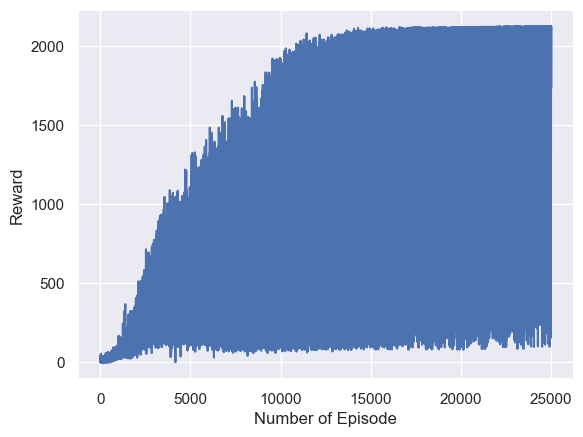

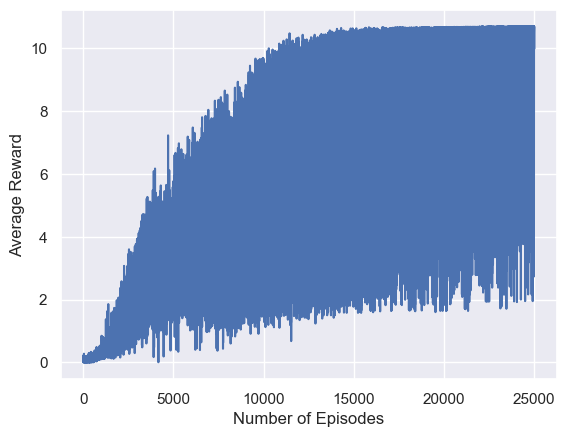

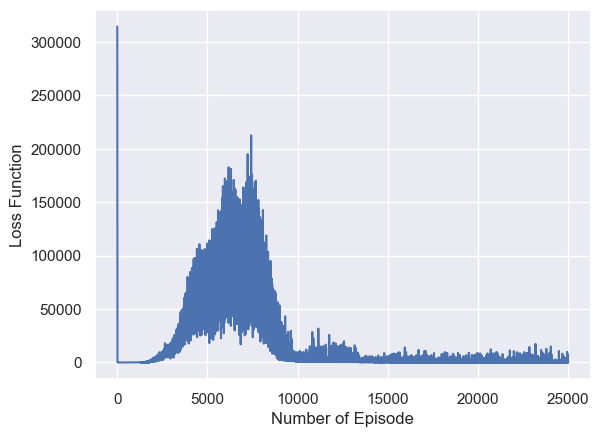

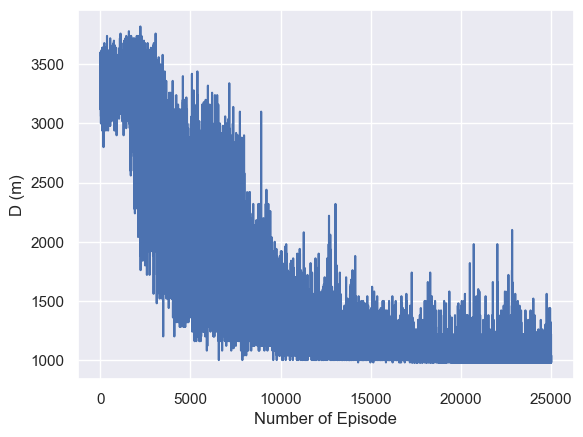

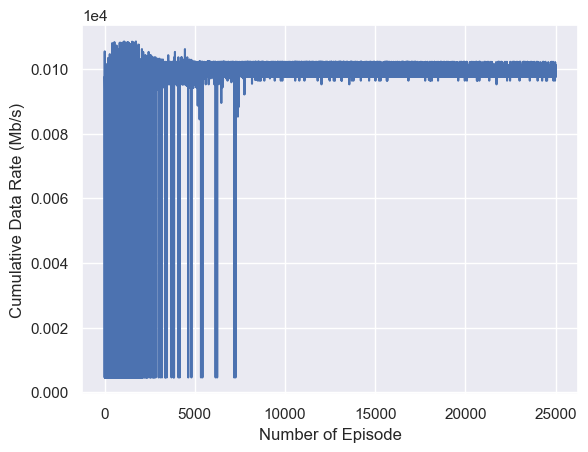

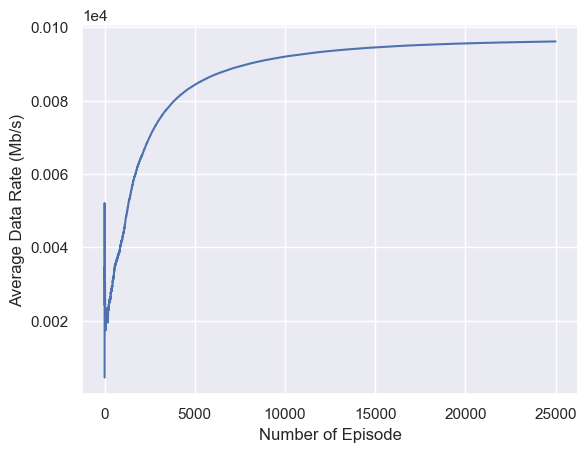

In [4]:
# training the dqn agent
num_episode=25000
step_per_episode=200

# reward
cum_rwd_per_episode=[]
Avg_rwd_per_episode=[]
# loss
losses_per_episode=[]
#energy
#Energy_per_episode=[]
#Avg_energy_training=[]
# data rate
cum_rate_per_episode=[]
Avg_rate_training=[]

Distance=[]
exploration_rate=1
# before it was 1000
#epsilon_decay=3000
epsilon_decay=0.9998
Max_epsilon=1
Min_epsilon=0.01

# saving all location in a array
x_location=[]
y_location=[]
z_location=[]

for i in range (num_episode):
    # reset environment
    state=env.reset()
    #print("state is:" ,state)
    cum_reward=0
    cum_rate=0
    reward_per_action=[]
    #Avg_rate=[]
    losses=0
    done=False
    #epsilon=Max_epsilon
    
    for j in range (step_per_episode-1):
        #print("state is:" ,state)
        
        # action selection
        action=Agent_DQN.choose_action(state,exploration_rate)
        #print("Action is: ",action)
        
        # calculate reward for chosen action
        next_state,reward,done,Data_Rate=env.step(action)
        #print(reward)
        # save transition 
        loss=Agent_DQN.reply_buffer(state,action,reward,next_state,done)
        # sampling for agent training
        #loss=Agent_DQN.sample_buffer()
        if loss is not None:
            losses+=loss
        
        #energy_per_step,sum_energy=env.energy(state,next_state[0:3])
        
        #print("reward,next_state,done,energy: ",reward,next_state,done,energy_per_step)
        #print('========================')
        
        state=next_state
        cum_reward+=reward
        cum_rate=(Data_Rate["Rate_uav"]+Data_Rate["Rate_OMA"])
        reward_per_action.append(reward)
        #Avg_rate.append(Data_Rate["Rate"])
        
        if i==num_episode-1:
            x_location.append(next_state[0])
            y_location.append(next_state[1])
            z_location.append(next_state[2])
         
        if done:
            break

    exploration_rate *= epsilon_decay
    exploration_rate= max(exploration_rate,Min_epsilon)
    #exploration_rate = Min_epsilon + (Max_epsilon - Min_epsilon) *  math.exp(-1. * i / epsilon_decay)
        
    # average reward calculation
    Distance.append(Data_Rate["Distance"])
    
    cum_rwd_per_episode.append(cum_reward)
    Avg_rwd_per_episode.append(np.mean(reward_per_action))
    
    losses_per_episode.append(losses)
    
    
    cum_rate_per_episode.append(cum_rate)
    Avg_rate_training.append(np.mean(cum_rate_per_episode))
    
    #Energy_per_episode.append(sum_energy)
    #Avg_energy_training.append(np.mean(Energy_per_episode))
    

    
    # print the training results
    if (i%2==0):
        print('\rEpisode {} \t Reward: {:.2f},\t Loss: {:.2f}'.
               format(i, cum_rwd_per_episode[i], losses_per_episode[i]))
                                                                                         
        #print('\rEpisode {}\tloss: {:.2f}'.format(i, losses[i]))

    # save parameters of main network 
    if i==num_episode-1:
        # create a file to save weights and bias
        FILE="model_parameters.pth"
        torch.save(Agent_DQN.main_network.state_dict(),FILE)

# reward visualization
fig1 = plt.figure()
sns.set()
plt.plot(cum_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')

#norm=[]
#for k in reward_per_episode:
#    k=(k-min(reward_per_episode))/(max(reward_per_episode)-min(reward_per_episode))
#    norm.append(k)
#fig2 = plt.figure()
#sns.set()
#plt.plot(norm)
#plt.xlabel('Number of Episode')
#plt.ylabel('Normalized Reward')

fig2 = plt.figure()
sns.set()
plt.plot(Avg_rwd_per_episode)
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')


# loss visualization
# convert loss values which are tensor values to a list of numpy array
losses_per_episode=[k.detach().numpy() for k in losses_per_episode if k is not None]
fig3=plt.figure()
sns.set()
plt.plot(losses_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Loss Function')

fig4=plt.figure()
sns.set()
plt.plot(Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')



# energy usage visualization
#fig3 = plt.figure()
#sns.set()
#plt.plot(Energy_per_episode)
#plt.xlabel('Number of Episode')
#plt.ylabel('Energy Usage (kJ)')

#fig5 = plt.figure()
#sns.set()
#plt.plot(Avg_energy_training)
#plt.xlabel('Number of Episode')
#plt.ylabel('Average Energy Usage (kJ) ')

# Data rate
fig5 = plt.figure()
sns.set()
plt.plot(cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Cumulative Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

fig6 = plt.figure()
sns.set()
plt.plot(Avg_rate_training)
plt.xlabel('Number of Episode')
plt.ylabel('Average Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


plt.show()

[220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 200, 200, 200, 200, 200, 200, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,

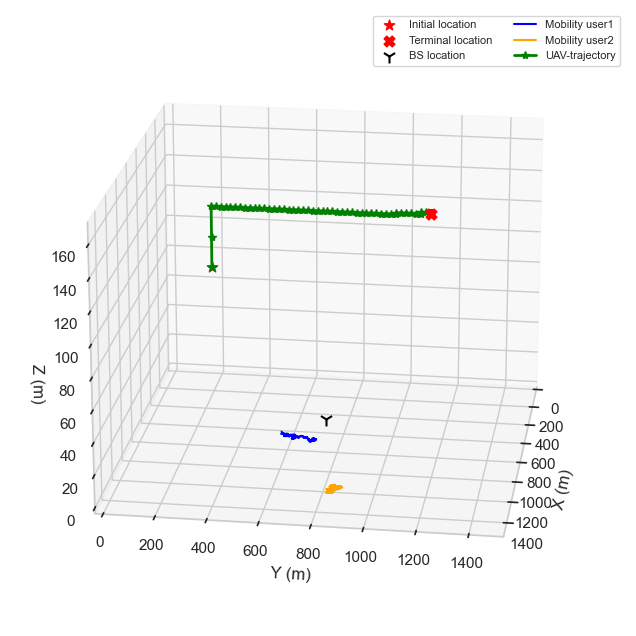

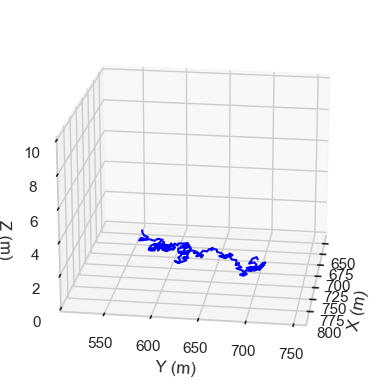

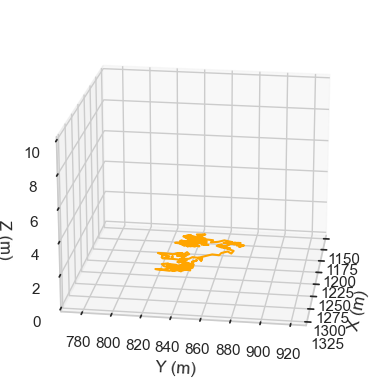

In [5]:
sns.set_style("whitegrid")
env.path_plot(x_location,y_location,z_location)
print(x_location)
print(y_location)
print(z_location)

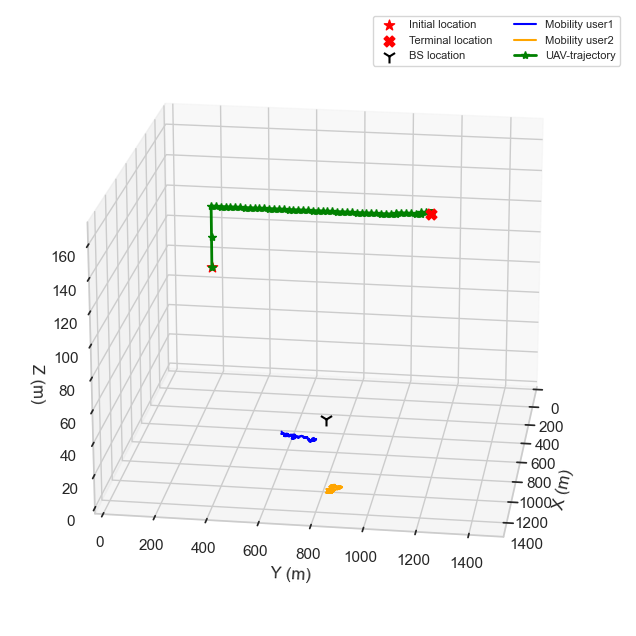

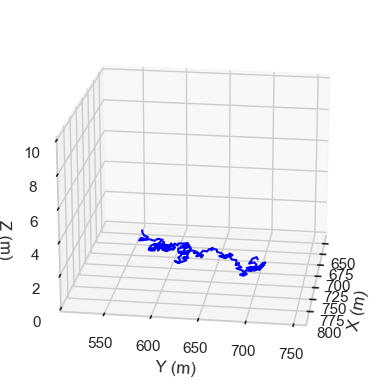

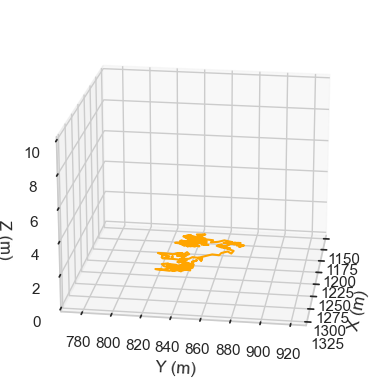

In [6]:
# uav trajectory for last episode
# the reason why uav is jumped to the terminal state is that I appened the destination to the 3 arrays, fix it!
#print(x_location)
#print(y_location)
#print(z_location)
from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('rwd_per_episode_OMA.csv', cum_rwd_per_episode, delimiter=',')
savetxt('Avg_rwd_per_episode_OMA.csv', Avg_rwd_per_episode, delimiter=',')
savetxt('loss_OMA.csv', losses_per_episode, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('cum_rate_per_episode_OMA.csv', cum_rate_per_episode, delimiter=',')
savetxt('Distance_OMA.csv', Distance, delimiter=',')
sns.set_style("whitegrid")
env.path_plot(x_location,y_location,z_location)

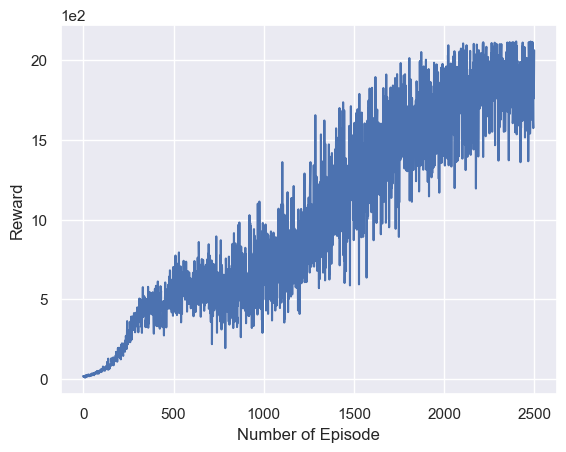

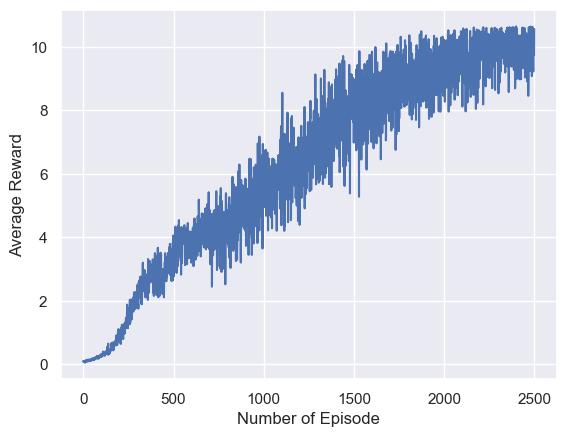

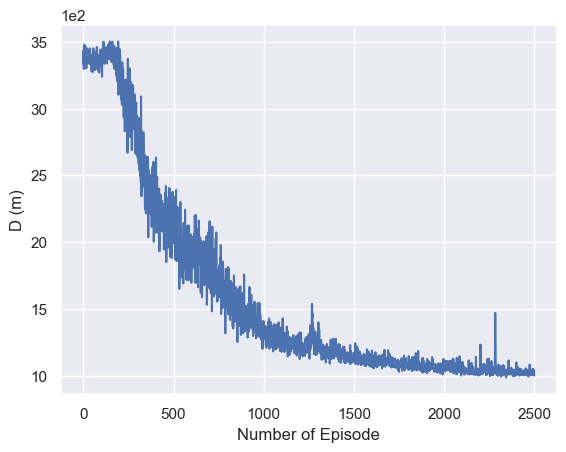

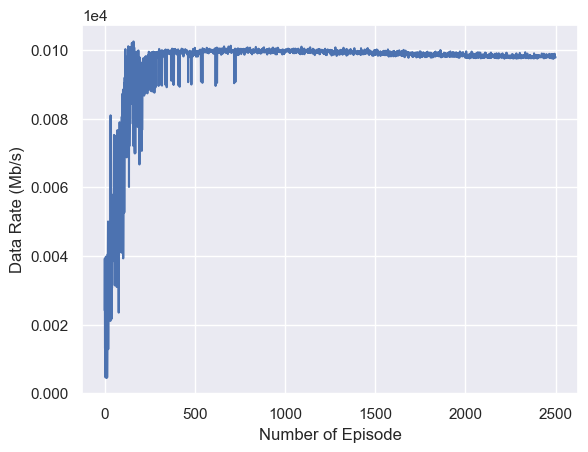

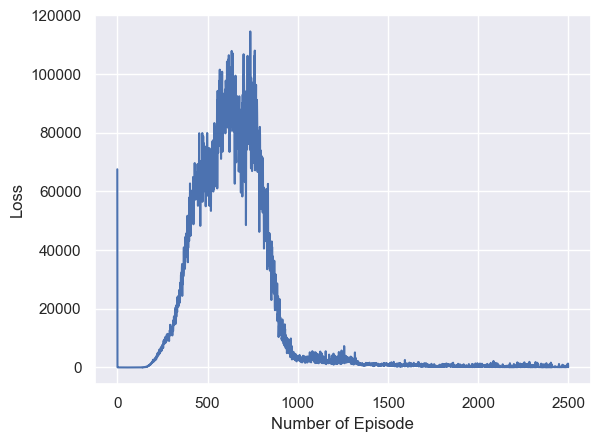

In [7]:
New_rwd_per_episode=[]
for r in range(len(cum_rwd_per_episode)):
        if  r==len(cum_rwd_per_episode)-1:
            samples=np.mean(cum_rwd_per_episode[r-9:])
            #print(samples)
            New_rwd_per_episode.append(samples)
        elif r%10==0 and r!=0:
            samples=np.mean(cum_rwd_per_episode[r-10:r])
            #print(samples)
            New_rwd_per_episode.append(samples)

fig1= plt.figure()
sns.set()
plt.plot(New_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))



New_Avg_rwd_per_episode=[]
for a in range(len(Avg_rwd_per_episode)):
        if  a==len(Avg_rwd_per_episode)-1:
            samples=np.mean(Avg_rwd_per_episode[a-9:])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)
        elif a%10==0 and a!=0:
            samples=np.mean(Avg_rwd_per_episode[a-10:a])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)

fig2= plt.figure()
sns.set()
plt.plot(New_Avg_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Average Reward')


New_Distance=[]
for d in range(len(Distance)):
        if  d==len(Distance)-1:
            samples=np.mean(Distance[d-9:])
            #print(samples)
            New_Distance.append(samples)
        elif d%10==0 and d!=0:
            samples=np.mean(Distance[d-10:d])
            #print(samples)
            New_Distance.append(samples)

fig3= plt.figure()
sns.set()
plt.plot(New_Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

New_cum_rate_per_episode=[]
for b in range(len(cum_rate_per_episode)):
        if  b==len(cum_rate_per_episode)-1:
            samples=np.mean(cum_rate_per_episode[b-9:])
            #print(samples)
            New_cum_rate_per_episode.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(cum_rate_per_episode[b-10:b])
            #print(samples)
            New_cum_rate_per_episode.append(samples)

fig4= plt.figure()
sns.set()
plt.plot(New_cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

New_loss=[]
for b in range(len(losses_per_episode)):
        if  b==len(losses_per_episode)-1:
            samples=np.mean(losses_per_episode[b-9:])
            #print(samples)
            New_loss.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(losses_per_episode[b-10:b])
            #print(samples)
            New_loss.append(samples)

fig5= plt.figure()
sns.set()
plt.plot(New_loss)
plt.xlabel('Number of Episode')
plt.ylabel('Loss')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('New_rwd_per_episode_OMA.csv', New_rwd_per_episode, delimiter=',')
savetxt('New_Avg_rwd_per_episode_OMA.csv', New_Avg_rwd_per_episode, delimiter=',')
savetxt('New_loss_OMA.csv', New_loss, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('New_cum_rate_per_episode_OMA.csv', New_cum_rate_per_episode, delimiter=',')
savetxt('New_Distance_OMA.csv', New_Distance, delimiter=',')
